# Financial Modelling 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

# To supress warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

## 1. Unemployment Rate

In [2]:
# Reading The Data
df = pd.read_excel(r"C:\Users\manis\Desktop\Unemployment rate.xlsx")
df.head()

,Date,Unemployment Rate (National Level)
0,2004-01-28,5.785714
1,2004-02-28,5.744286
2,2004-03-28,5.700000
3,2004-04-28,5.667033
4,2004-05-28,5.632967


In [3]:
# setting date column to datetype and index
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Unemployment Rate (National Level)
0,2004-01-28,5.785714
1,2004-02-28,5.744286
2,2004-03-28,5.700000
3,2004-04-28,5.667033
4,2004-05-28,5.632967


In [4]:
# Setting the Date as DataFrame Index
df.set_index('Date',inplace=True)
df.head()

,Unemployment Rate (National Level)
Date,
2004-01-28,5.785714
2004-02-28,5.744286
2004-03-28,5.700000
2004-04-28,5.667033
2004-05-28,5.632967


In [5]:
# Setting Default Parameters for plotting
plt.rcParams['figure.figsize'] = (30, 10)
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

### Plotting the data

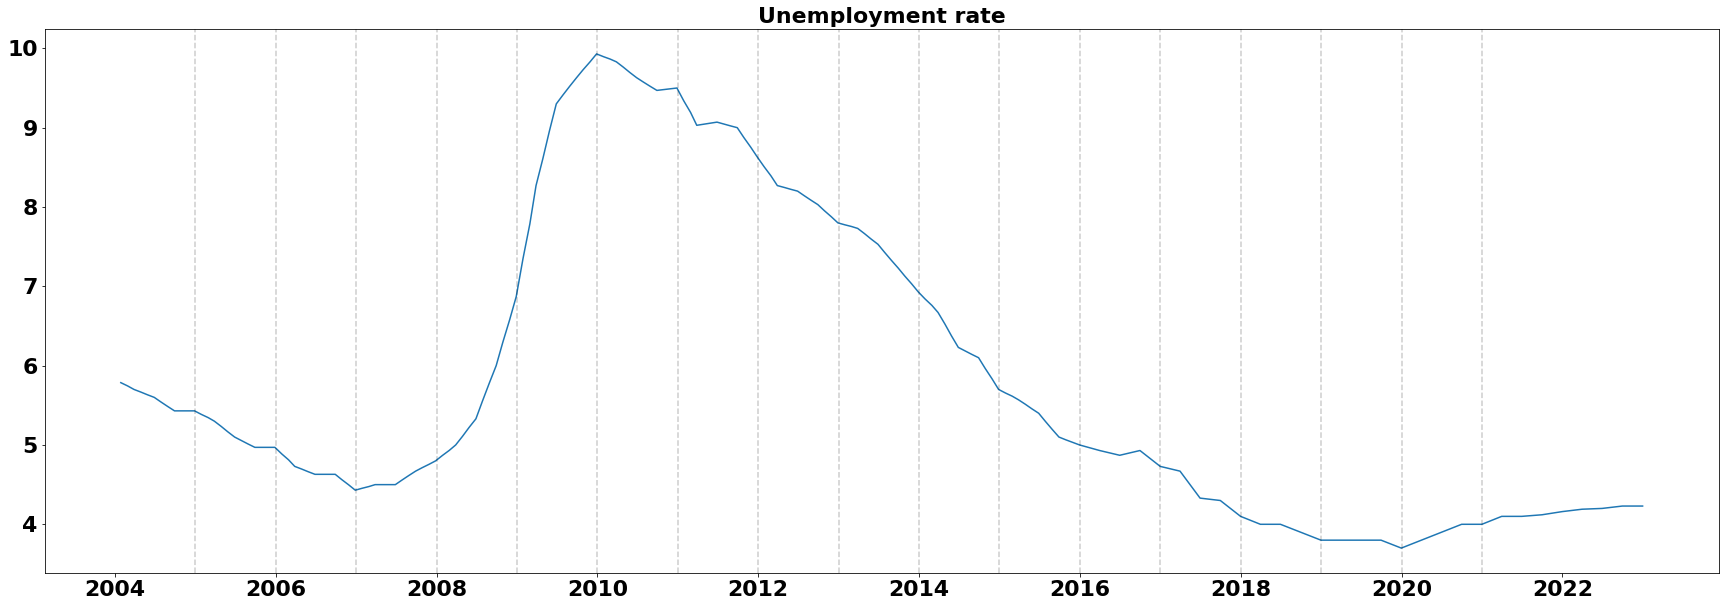

In [6]:
plt.plot(df['Unemployment Rate (National Level)'],label="Data")
plt.title("Unemployment rate",font={'weight':'bold'})
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color='k',linestyle="--",alpha=0.2)
plt.show()

### Checking for trend & seasonality

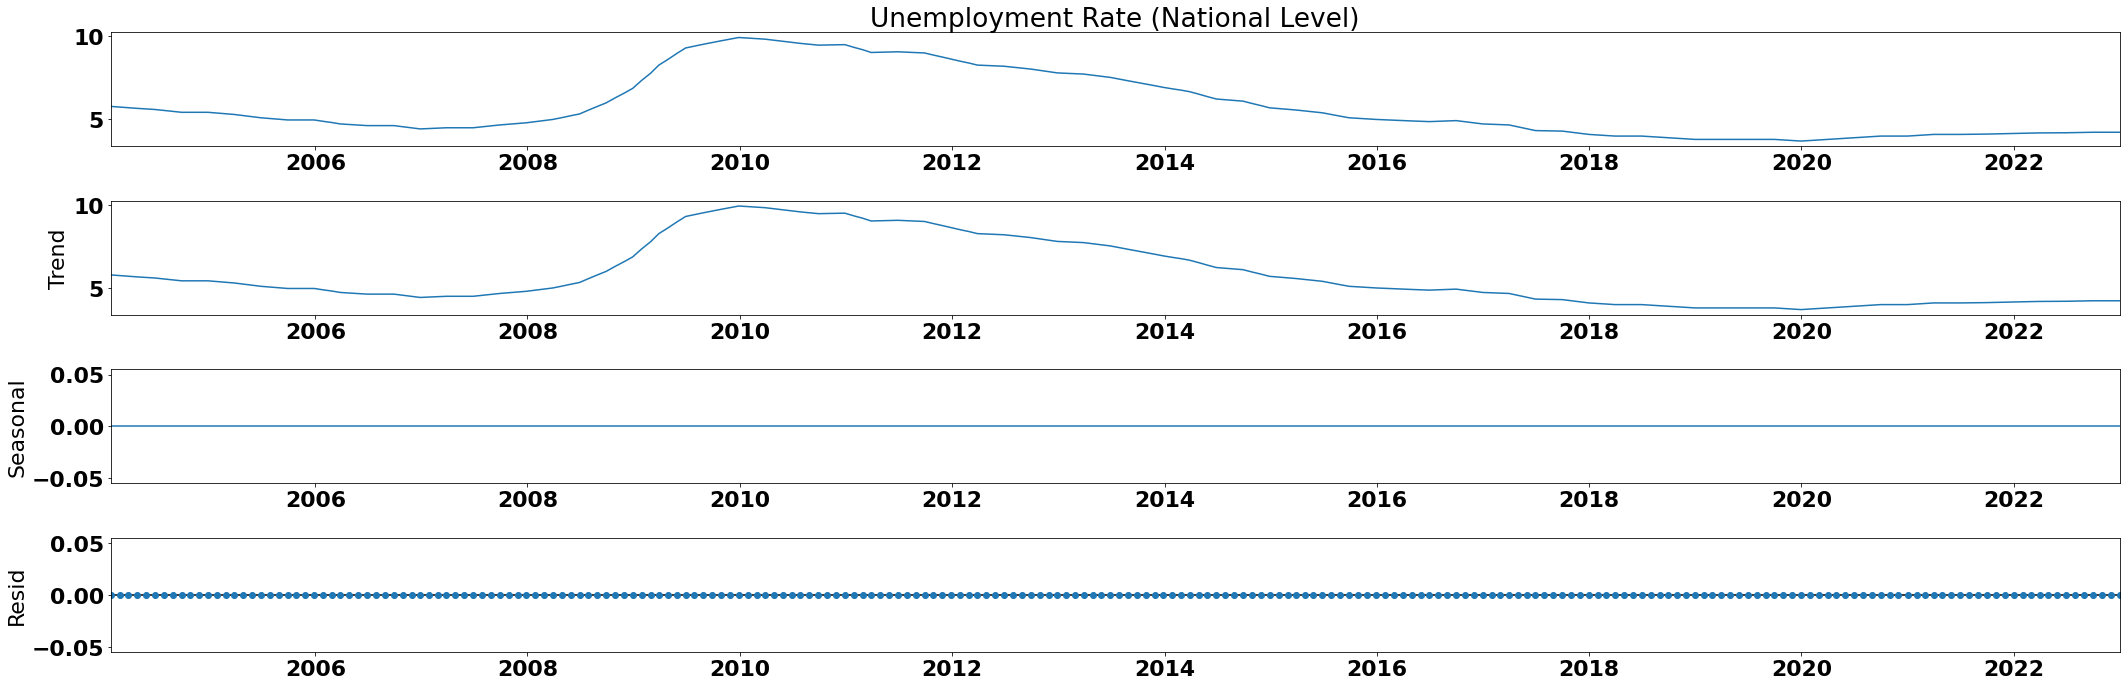

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Unemployment Rate (National Level)'], model='additive', period=1)
result.plot()
plt.show()

### Result:
We are able to see only Trend but not seasonality While doing the TS Decomposition. Hence we do ADF test to check if the data is stationary or not

## ADF Test

In [8]:
# Module Required
from statsmodels.tsa.stattools import adfuller

# ADF test
# adf_result = adfuller(df, autolag='AIC'`)

def adfuller_result(df, autolag="AIC"):
    adf_result = adfuller(df, autolag='AIC')
    print("ADF Statistic: {}".format(adf_result[0]))
    print("P-Value: {}".format(adf_result[1]))
    print("Critical Value:")
    for key, value in adf_result[4].items():
        print("\t",key,":",value)
        
    if adf_result[0] < adf_result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [9]:
# Testing Stationarity 
adfuller_result(df['Unemployment Rate (National Level)'])

ADF Statistic: -2.1032760914211703
P-Value: 0.2431993109146749
Critical Value:
	 1% : -3.460018927623594
	 5% : -2.8745897386146817
	 10% : -2.57372514086348
Failed to Reject Ho - Time Series is Non-Stationary


#### Differencing TS to check if we can remove the stationarity or not

In [10]:
# making a copy of df
df1 = df.copy()

In [11]:
# Taking differencing at first lag
df1["diff_1"] = df.diff(1)

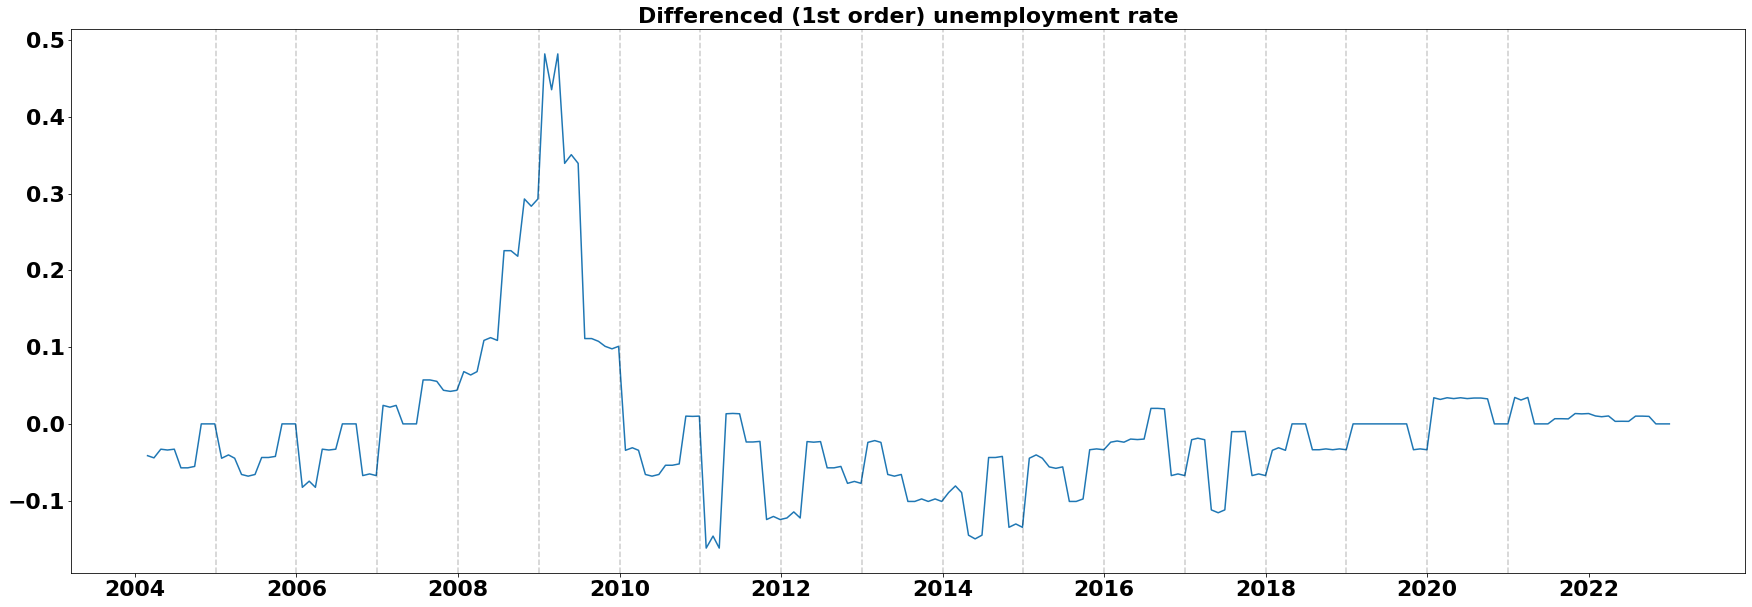

In [12]:
# plotting 
plt.plot(df1.diff_1,label="Data")
plt.title("Differenced (1st order) unemployment rate",font={'weight':'bold'})
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color='k',linestyle="--",alpha=0.2)
plt.show()

In [13]:
# Testing for Stationarity
adfuller_result(df1.diff_1.dropna())

ADF Statistic: -2.2489571812223246
P-Value: 0.18895876108282234
Critical Value:
	 1% : -3.46172743446274
	 5% : -2.8753374677799957
	 10% : -2.574124089081557
Failed to Reject Ho - Time Series is Non-Stationary


In [14]:
# taking a second order differencing
df1["diff_2"] = df1.diff_1.diff()

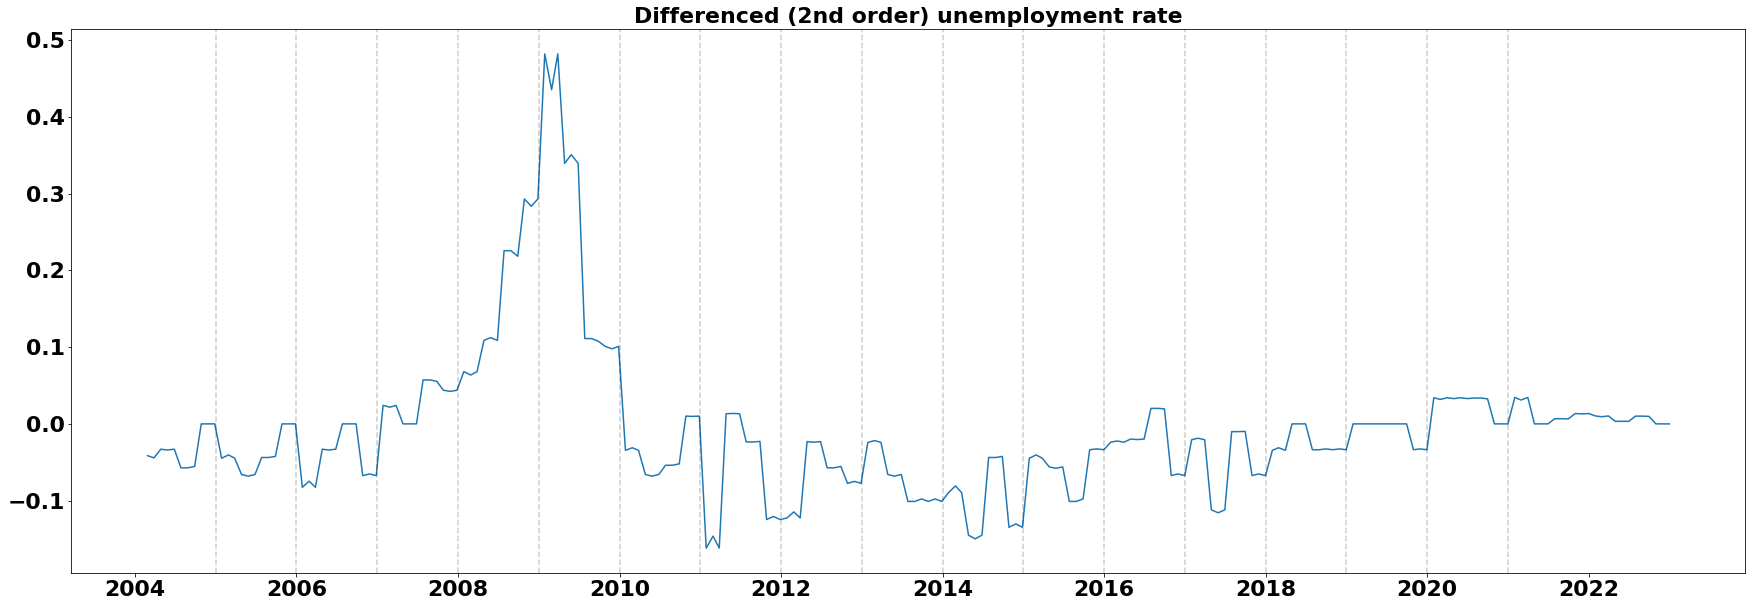

In [15]:
# plotting 
plt.plot(df1.diff_1,label="Data")
plt.title("Differenced (2nd order) unemployment rate",font={'weight':'bold'})
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color='k',linestyle="--",alpha=0.2)
plt.show()

In [16]:
adfuller_result(df1.diff_2.dropna())

ADF Statistic: -5.068698379460245
P-Value: 1.619960392354144e-05
Critical Value:
	 1% : -3.46172743446274
	 5% : -2.8753374677799957
	 10% : -2.574124089081557
Reject Ho - Time Series is Stationary


### Result:
The time series get stationary at the second order differencing

### ACF & PACF

In [17]:
# importing Library 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf

[1.         0.9972007  0.99193071 0.98438581 0.9747873  0.96322956
 0.94980744 0.93463518 0.9178627  0.89962539 0.88005723 0.85930662
 0.83753133 0.81489492 0.79152599 0.76754735 0.74309145 0.71818826
 0.69285567 0.66711119 0.64104171 0.61472094 0.58821842 0.56154857]


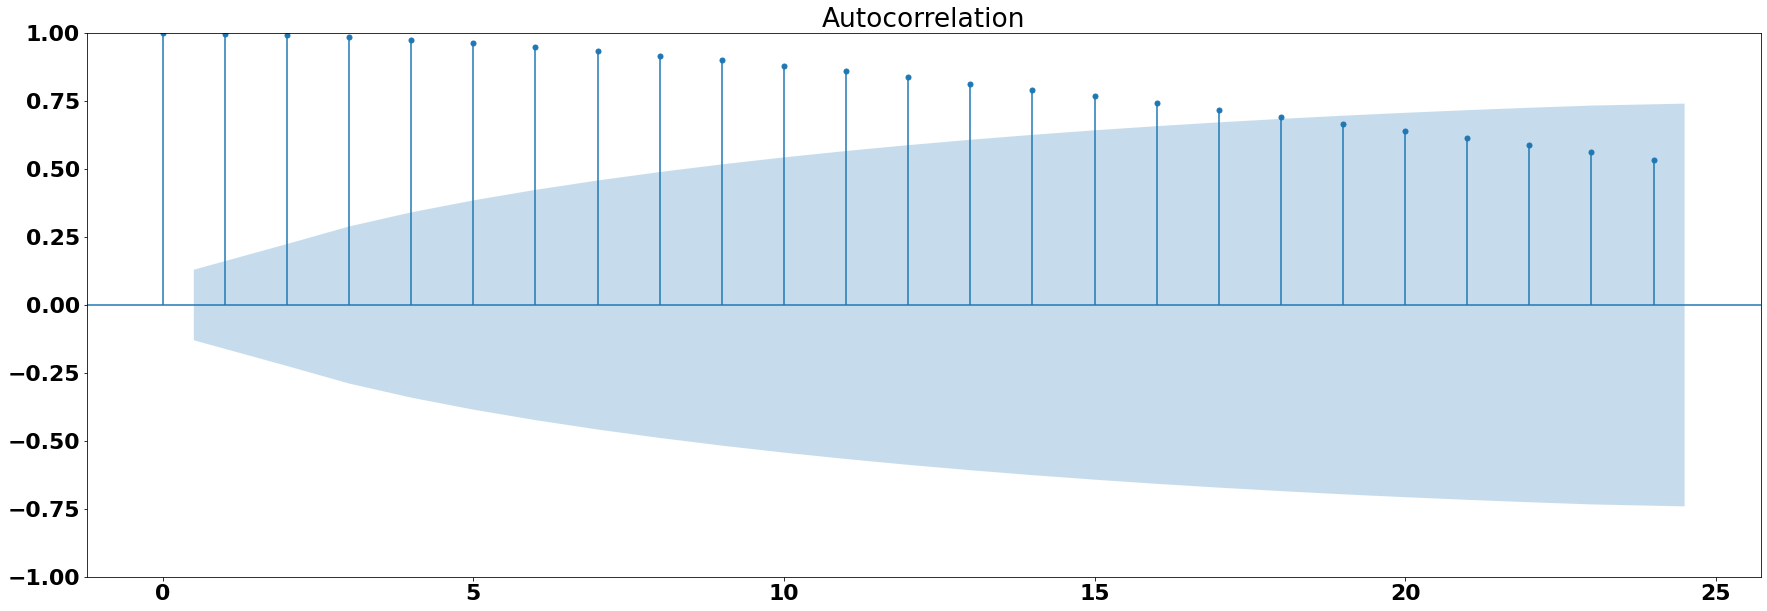

In [18]:
# plotting acf
print(acf(df.dropna()))
acf_plot = plot_acf(df) # Plotting the autocorrelation

[ 1.          1.00159365  0.77777721  3.36495577 -1.40762415 -0.59091385
 -0.38055146 -0.28880272 -0.2450434  -0.21976595 -0.20749451 -0.20800094
 -0.22095427 -0.24944825 -0.29407663 -0.37940311 -0.57638131 -1.27055296
  4.54919209  0.82720046  0.46881811  0.34171723  0.28256352  0.2646027 ]


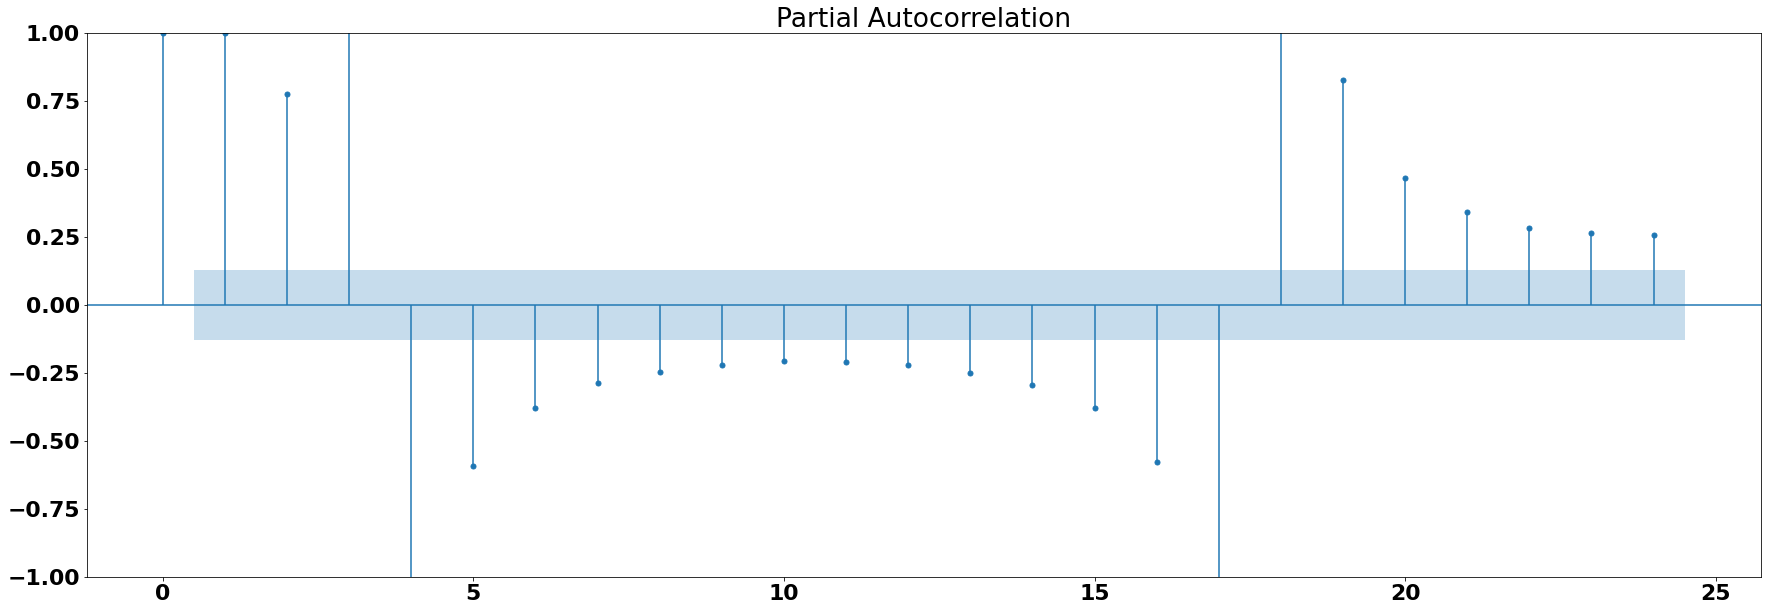

In [19]:
# plotting pacf
print(pacf(df.dropna()))
pacf_plot = plot_pacf(df) # Plotting the autocorrelation

### Result:
We are the ACF plot is decaying and PACF plot has significant lags but the lag trends reverse after 3rd lag lag.

## ARIMA MODEL

In [20]:
# !pip install pmdarima

In [21]:
# Importing pmdarima to generate multiple result for combinations of p,q,d
from pmdarima import auto_arima

In [22]:
stepwise_fit = auto_arima(df['Unemployment Rate (National Level)'],
                         trace=True,
                         suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-816.601, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-404.527, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-815.652, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-583.539, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-405.428, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-814.401, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-814.673, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-817.036, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-815.092, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-820.155, Time=0.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-819.290, Time=0.59 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-817.501, Time=0.79 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-817.881, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-818.998, Time=0.65 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

### Result:
Thus by running this simulation we get the best p,q,d as 4,1,2

In [23]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 419.121
Date:                Mon, 31 Jan 2022   AIC                           -824.242
Time:                        19:39:56   BIC                           -800.267
Sample:                             0   HQIC                          -814.568
                                - 228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9309      0.179      5.196      0.000       0.580       1.282
ar.L2         -0.7373      0.213     -3.463      0.001      -1.155      -0.320
ar.L3          0.4878      0.142      3.431      0.001       0.209       0.766
ar.L4          0.1812      0.114      1.589      0.112      -0.042       0.405
ma.L1         -0.0397      0.116     -0.341      0.733      -0.268       0.188
ma.L2          0.8156      0.097      8.428      0.000       0.626       1.005
sigma2         0.0014   7.23e-05     19.340      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1183.89
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Fitting ARIMA model

In [24]:
# Importing library
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Splitting the Data into Train-Test

train = pd.DataFrame(df['Unemployment Rate (National Level)'][:-10])
test = pd.DataFrame(df['Unemployment Rate (National Level)'][-10:])

In [26]:
train.shape,test.shape

((218, 1), (10, 1))

In [27]:
# Creating model with p=4,d=1,q=2
model = ARIMA(train['Unemployment Rate (National Level)'],order=(4,1,2))

# Fitting Model
model = model.fit()

# Model Summary
model.summary()

C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\manis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Unemployment Rate (National Level)   No. Observations:                  218
Model:                                 ARIMA(4, 1, 2)   Log Likelihood                 395.346
Date:                                Mon, 31 Jan 2022   AIC                           -776.692
Time:                                        19:39:56   BIC                           -753.032
Sample:                                             0   HQIC                          -767.134
                                                - 218                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8908      0.209      4.268      0.000       0.482       1.300
ar.L2         -0.6438      0.260     -2.481      0.013      -1.152      -0.135
ar.L3          0.4429      0.160      2.775      0.006       0.130       0.756
ar.L4          0.1863      0.121      1.538      0.124      -0.051       0.424
ma.L1         -0.0053      0.164     -0.032      0.974      -0.327       0.316
ma.L2          0.7674      0.129      5.958      0.000       0.515       1.020
sigma2         0.0014      7e-05     20.428      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1084.28
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Doing the prediction for the test data
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start,end=end,typ='levels').rename("Prediction")
pred.index = df.index[start:end+1]
print(pred)

Date
2022-03-31    4.190175
2022-04-30    4.199988
2022-05-31    4.208023
2022-06-30    4.215256
2022-07-31    4.222832
2022-08-31    4.230310
2022-09-30    4.236796
2022-10-31    4.242462
2022-11-30    4.248058
2022-12-31    4.253661
Name: Prediction, dtype: float64


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

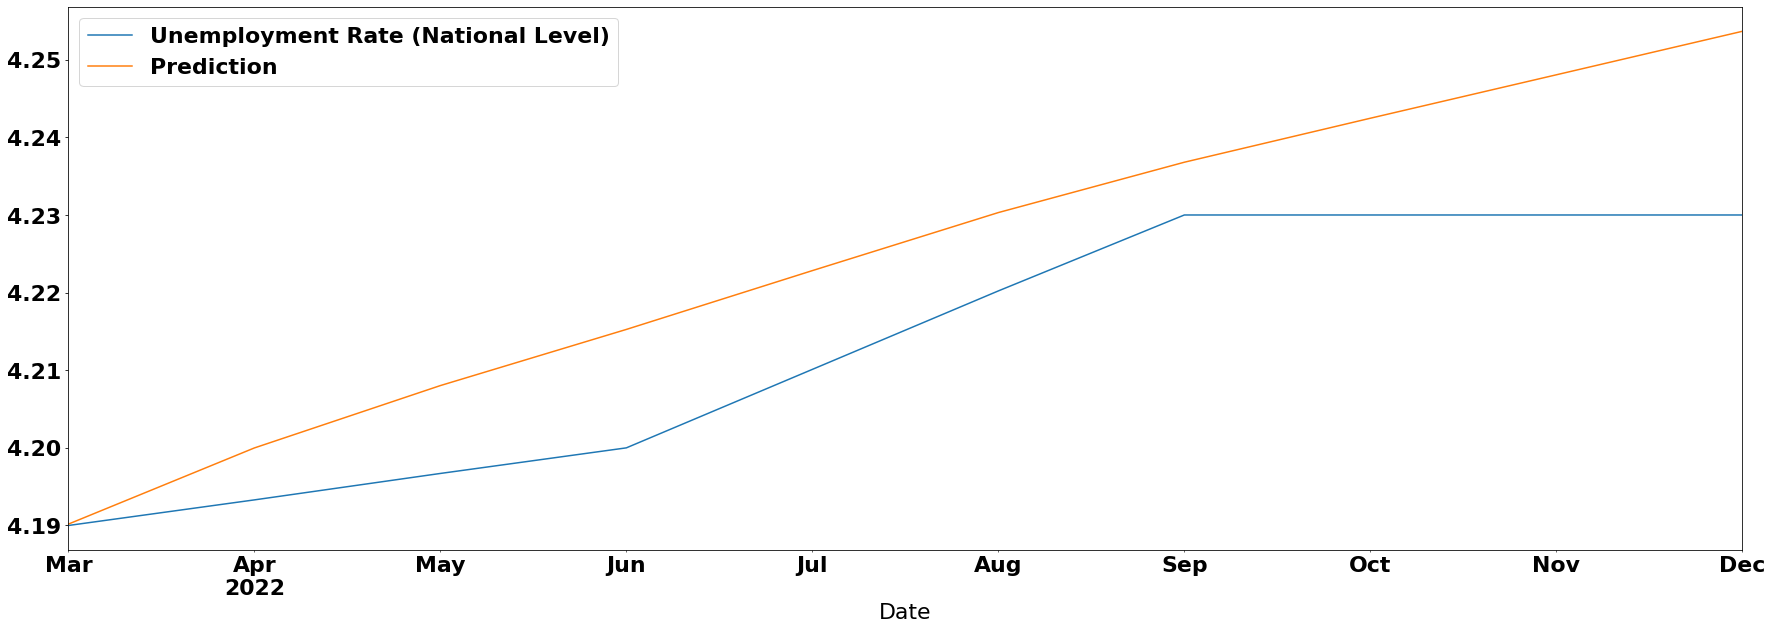

In [29]:
# Plotting Test vs Prediction data
test.plot(legend=True)
pred.plot(legend=True)

### Evaluating model with rmse score

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

0.013254764552397741


### Predicting the into the future

In [31]:
index_future_dates=pd.date_range(start='2022-12-31',end='2023-01-30')
#print(index_future_dates)
pred_future =model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred_future.index=index_future_dates
print(pred_future)

2022-12-31    4.258768
2023-01-01    4.263245
2023-01-02    4.267469
2023-01-03    4.271656
2023-01-04    4.275600
2023-01-05    4.279124
2023-01-06    4.282365
2023-01-07    4.285510
2023-01-08    4.288522
2023-01-09    4.291271
2023-01-10    4.293779
2023-01-11    4.296163
2023-01-12    4.298451
2023-01-13    4.300577
2023-01-14    4.302521
2023-01-15    4.304342
2023-01-16    4.306080
2023-01-17    4.307714
2023-01-18    4.309219
2023-01-19    4.310617
2023-01-20    4.311941
2023-01-21    4.313191
2023-01-22    4.314352
2023-01-23    4.315428
2023-01-24    4.316440
2023-01-25    4.317396
2023-01-26    4.318289
2023-01-27    4.319118
2023-01-28    4.319893
2023-01-29    4.320623
2023-01-30    4.321309
Freq: D, Name: ARIMA Predictions, dtype: float64


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [32]:
pred = model.predict(typ='levels')

<AxesSubplot:xlabel='Date'>

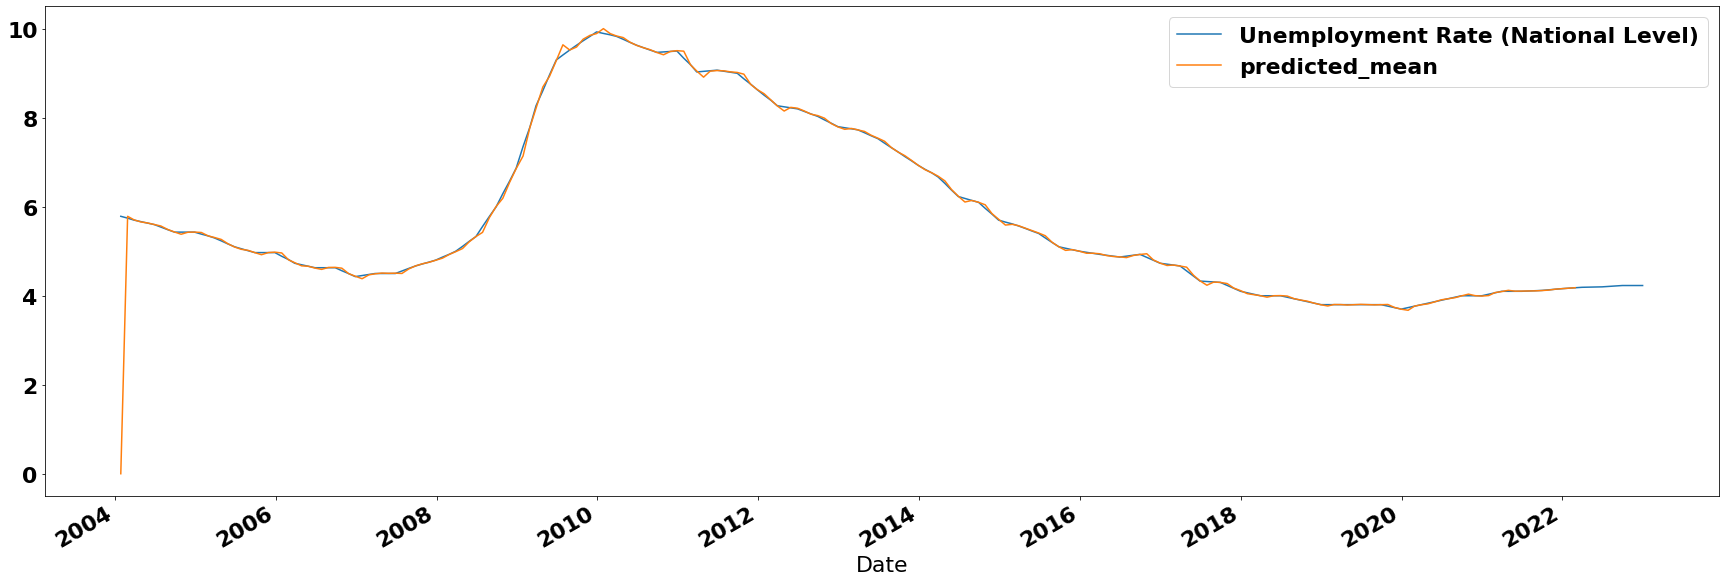

In [33]:
df.plot(legend=True)
pred.plot(legend=True)

## 2. Consumer Confidence Index

In [34]:
df = pd.read_excel(r"C:\Users\manis\Desktop\CCI.xlsx",index_col=0)
df.head()

,Consumer Confidence Index
Date,
2004-01-28,90.303846
2004-02-28,90.906154
2004-03-28,91.550000
2004-04-28,93.115934
2004-05-28,94.734066


## Plotting the data

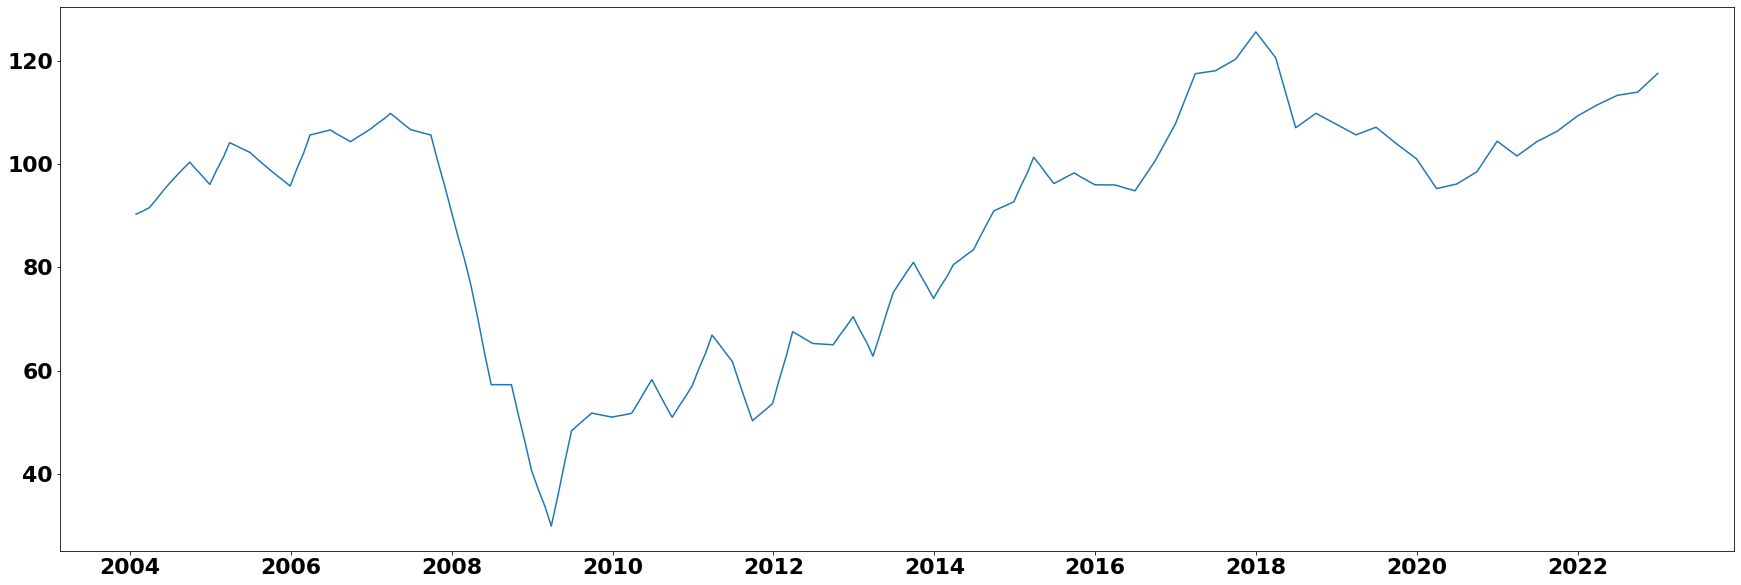

In [35]:
plt.plot(df)

## Checking for trend & Seasonality in data

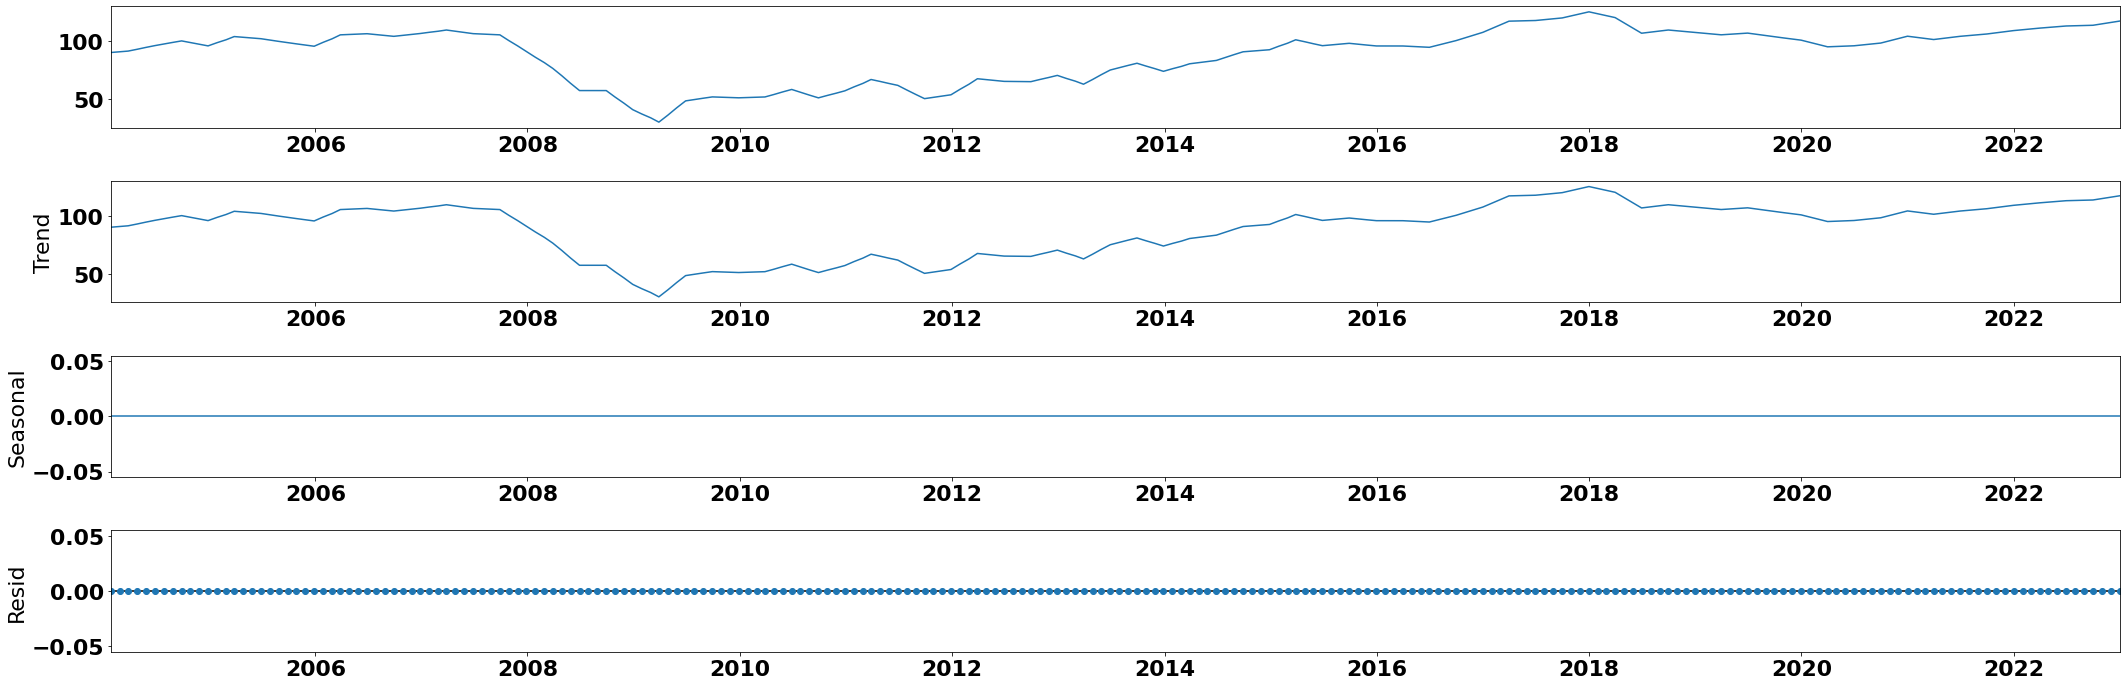

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive', period=1)

result.plot()
plt.show()

## Results:
The data seem to have trend but not seasonality. Hence we perform an ADF test to remove that.

## Stationarity test

In [37]:
# Module Required
from statsmodels.tsa.stattools import adfuller

# ADF test
# adf_result = adfuller(df, autolag='AIC')

def adfuller_result(df, autolag="AIC"):
    adf_result = adfuller(df, autolag='AIC')
    print("ADF Statistic: {}".format(adf_result[0]))
    print("P-Value: {}".format(adf_result[1]))
    print("Critical Value:")
    for key, value in adf_result[4].items():
        print("\t",key,":",value)
        
    if adf_result[0] < adf_result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [38]:
# Testing Stationarity 
adfuller_result(df["Consumer Confidence Index"])

ADF Statistic: -1.8553995882633045
P-Value: 0.35332443060549457
Critical Value:
	 1% : -3.460849270544952
	 5% : -2.87495318813585
	 10% : -2.5739190539191745
Failed to Reject Ho - Time Series is Non-Stationary


#### Differencing once

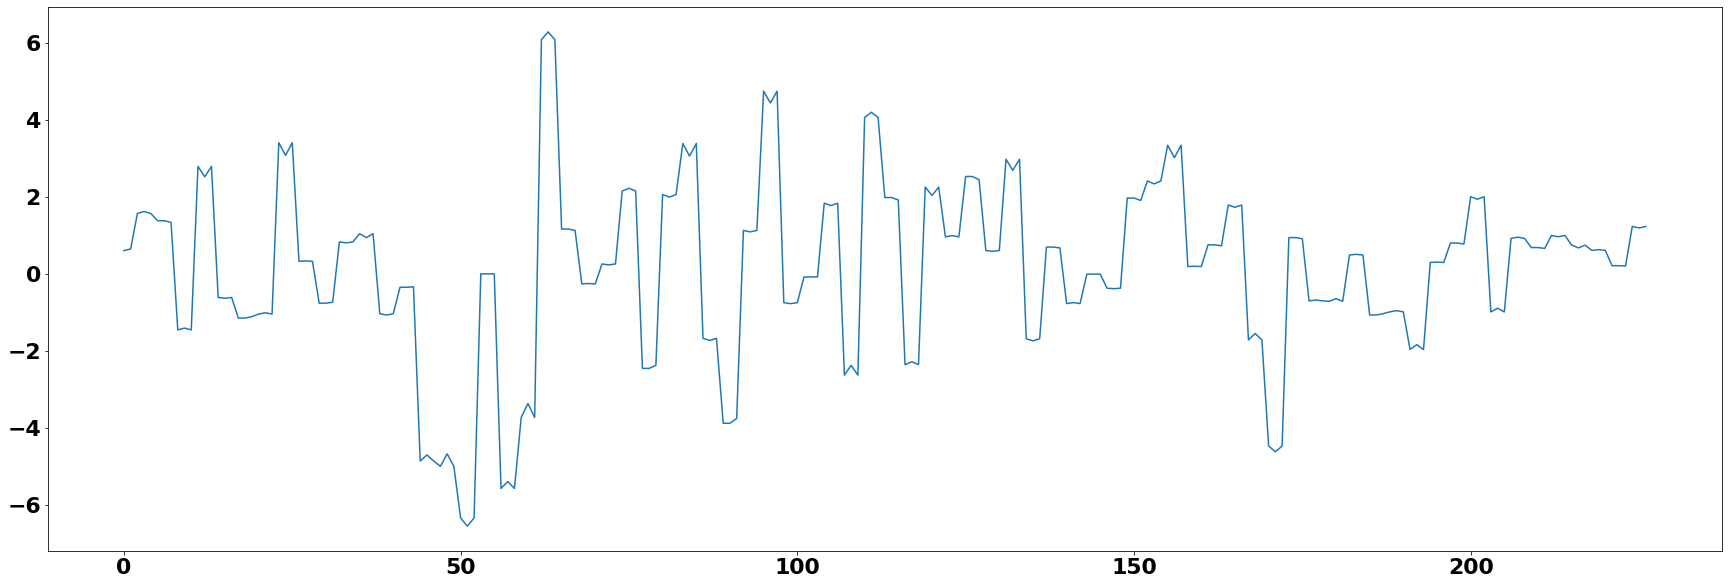

In [39]:
df["diff_1"] = df["Consumer Confidence Index"].diff()
diff_values = df["diff_1"].values
y_diff = diff_values[~np.isnan(diff_values)]
X = y_diff
plt.plot(X)

In [40]:
# Stationarity Test
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.041460
p-value: 0.031200
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


##### Time series is not stationary, difference twice.

### Differencing twice

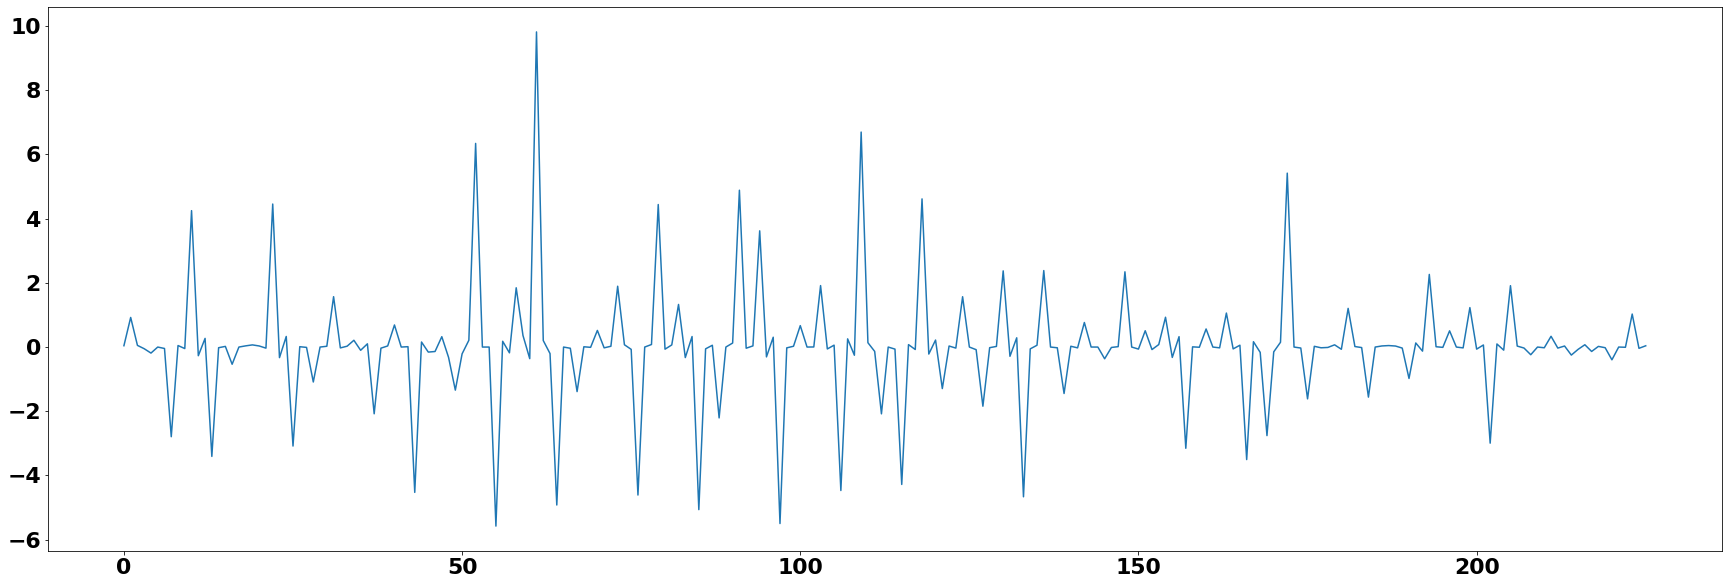

In [41]:
df["diff_2"] = df["diff_1"].diff()
diff_values2 = df["diff_2"].values
y_diff2 = diff_values2[~np.isnan(diff_values2)]
X = y_diff2
plt.plot(X)

In [42]:
# Stationarity Test
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.318773
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


### Results:
the data is now stationary. and we move forward with testing trend.

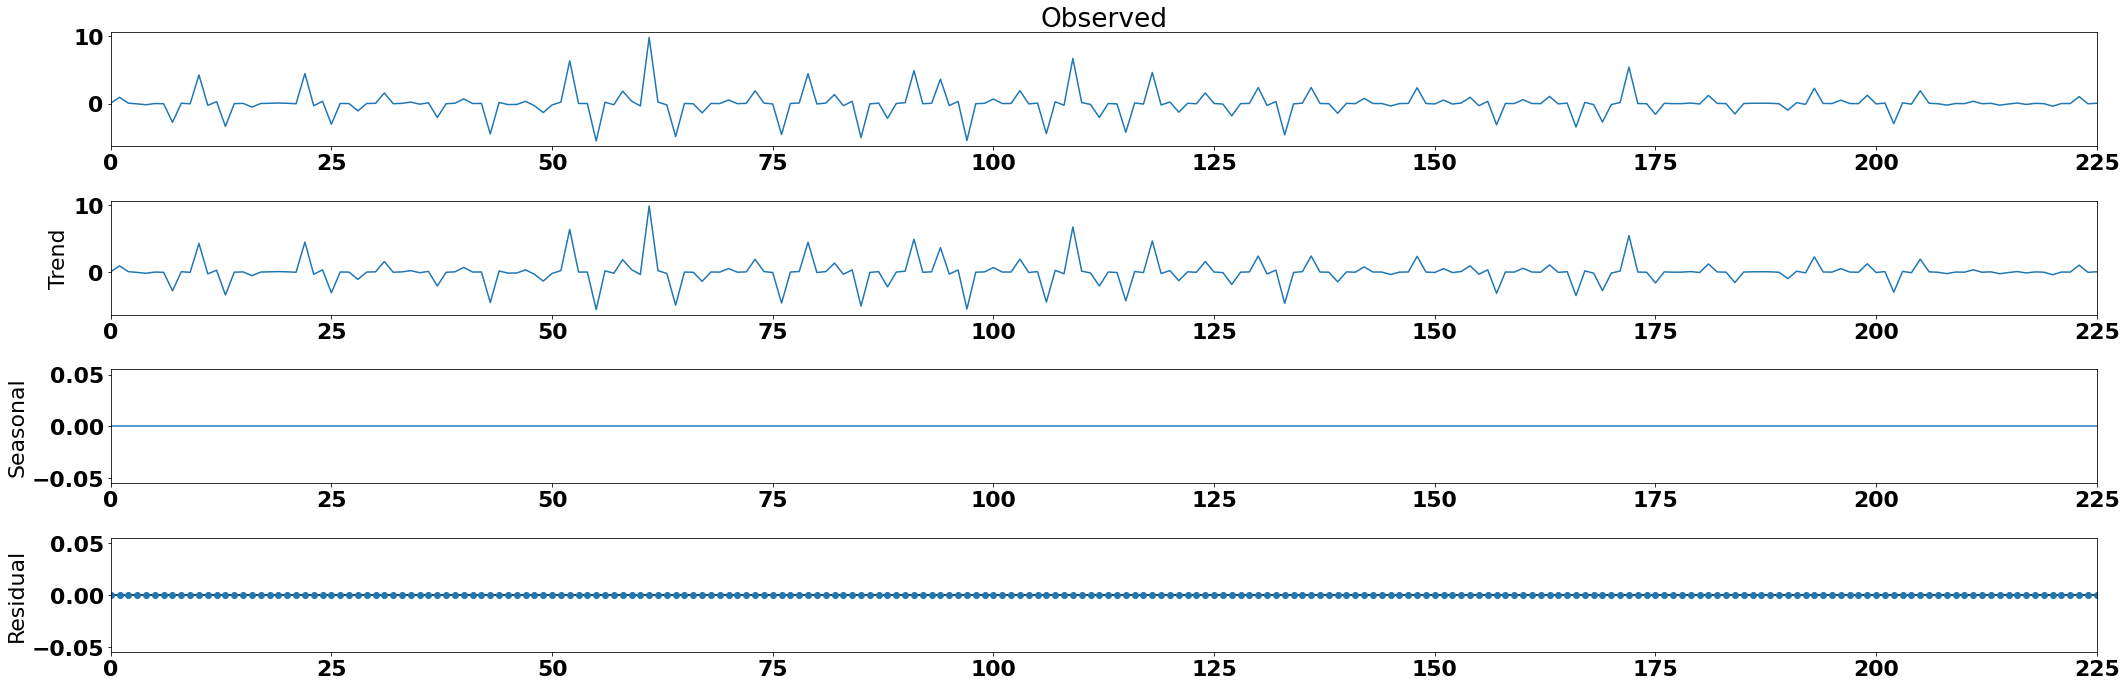

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(X, model='additive', period=1)

result.plot()
plt.show()

## Plotting Differenced series and their auto-correlation plots

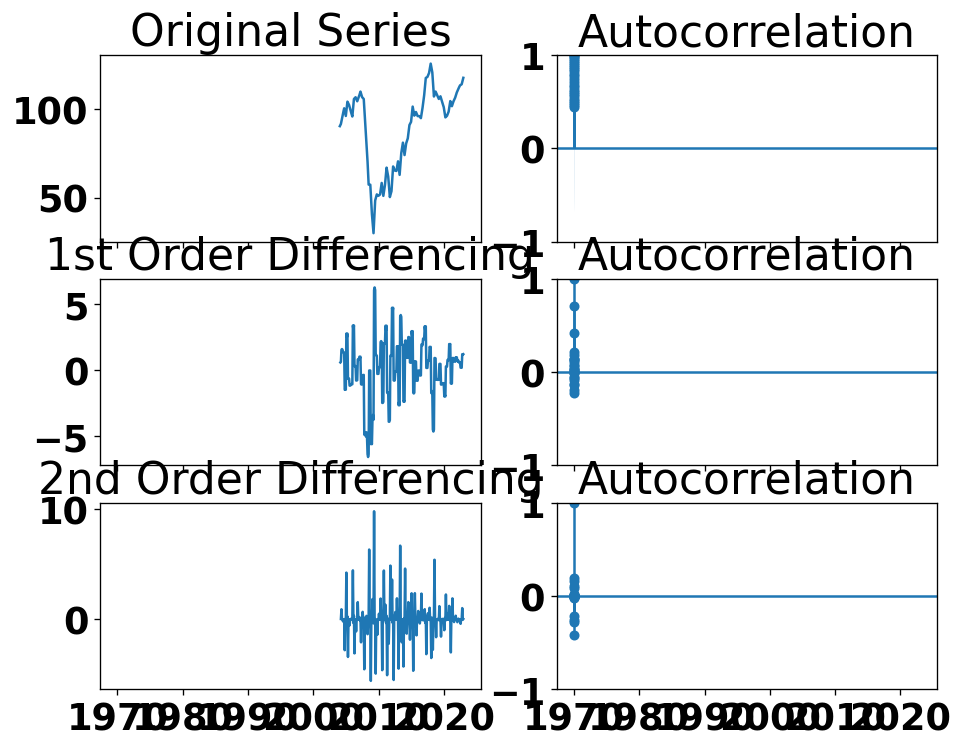

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["Consumer Confidence Index"]); axes[0, 0].set_title('Original Series')
plot_acf(df["Consumer Confidence Index"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df["Consumer Confidence Index"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["Consumer Confidence Index"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df["Consumer Confidence Index"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["Consumer Confidence Index"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

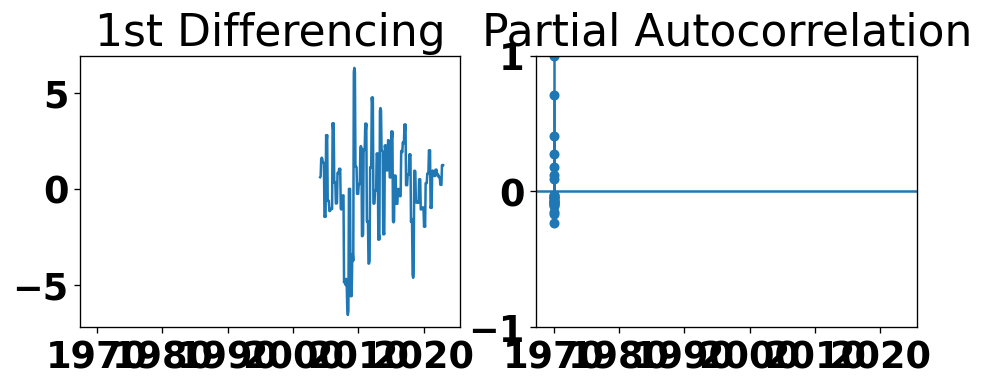

In [45]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["Consumer Confidence Index"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df["Consumer Confidence Index"].diff().dropna(), ax=axes[1])

plt.show()

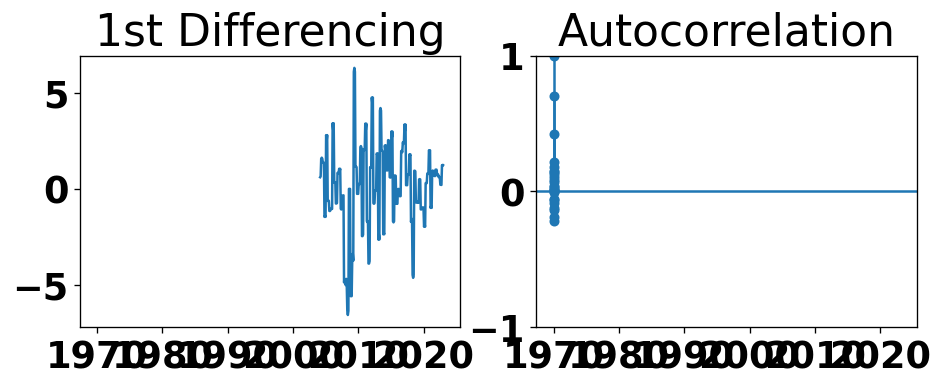

In [46]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["Consumer Confidence Index"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["Consumer Confidence Index"].diff().dropna(), ax=axes[1])

plt.show()

In [47]:
# importing Library 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf

[ 1.00000000e+00 -2.34755978e-02  2.23926359e-02 -4.17860780e-01
 -8.11891924e-03  6.21768940e-03 -2.11480215e-01  1.30884938e-02
 -1.33115593e-02  1.94394751e-01  1.42570836e-03 -6.74287234e-04
  1.08768365e-01 -1.45894170e-02  1.29294537e-02 -2.74679469e-01
  6.04205522e-03 -5.62276382e-03  8.53554507e-02 -1.79907731e-03
  4.20663120e-03  1.64100105e-01 -4.36213854e-03  3.57340118e-03]


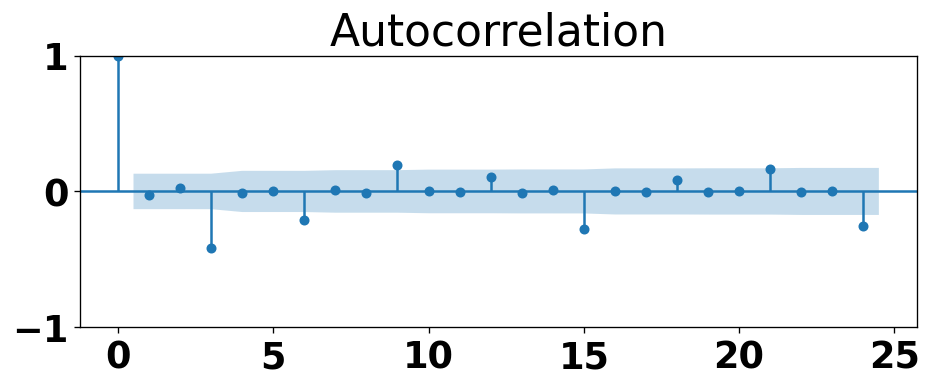

In [48]:
# plotting acf
print(acf(X))
acf_plot = plot_acf(X) # Plotting the autocorrelation

[ 1.         -0.02357993  0.02204882 -0.42288193 -0.02966116  0.02485016
 -0.48229439 -0.02210141  0.01287915 -0.21948868 -0.0138953   0.00360766
  0.05941317 -0.01507462  0.00751708 -0.17783514 -0.01724857  0.00810876
 -0.1367465  -0.03431634  0.02570117  0.02849322 -0.0306799   0.02501993]


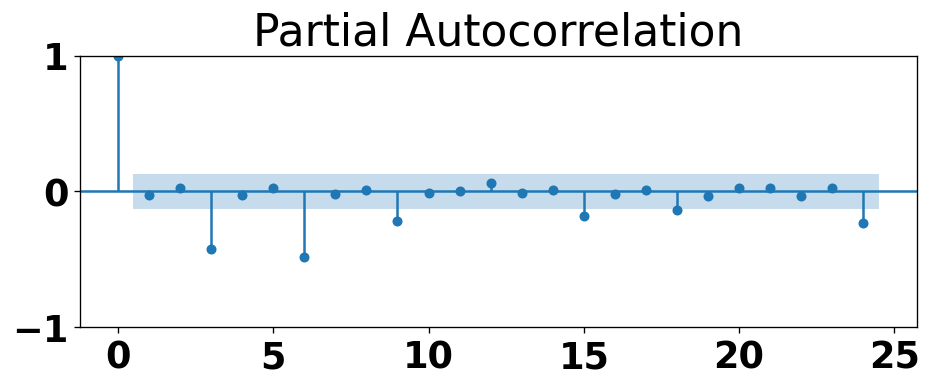

In [49]:
# plotting acf
print(pacf(X))
pacf_plot = plot_pacf(X)          #Plotting the autocorrelation

In [50]:
df

,Consumer Confidence Index,diff_1,diff_2
Date,,,
2004-01-28,90.303846,NaN,NaN
2004-02-28,90.906154,0.602308,NaN
2004-03-28,91.550000,0.643846,4.153860e-02
2004-04-28,93.115934,1.565934,9.220879e-01
2004-05-28,94.734066,1.618132,5.219770e-02
...,...,...,...
2022-08-31,113.757826,0.208913,1.000000e-07
2022-09-30,113.960000,0.202174,-6.739200e-03
2022-10-31,115.189891,1.229891,1.027717e+00


# ARIMA MODEL

In [51]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df["Consumer Confidence Index"], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=797.601, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1022.630, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=868.805, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=923.718, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1021.260, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=795.609, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=793.622, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=795.609, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=868.043, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=796.447, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=791.842, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=922.162, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=793.826, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=793.826, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=866

In [52]:
from statsmodels.tsa.arima.model import ARIMA

train = df.iloc[:-40]
test = df.iloc[-40:]
print(train.shape,test.shape)

(188, 3) (40, 3)


In [53]:
model = ARIMA(df["Consumer Confidence Index"],order = (0,1,2))
model = model.fit()
model.summary()

C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Consumer Confidence Index   No. Observations:                  228
Model:                        ARIMA(0, 1, 2)   Log Likelihood                -392.921
Date:                       Mon, 31 Jan 2022   AIC                            791.842
Time:                               19:40:01   BIC                            802.117
Sample:                                    0   HQIC                           795.988
                                       - 228                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9492      0.018     52.947      0.000       0.914       0.984
ma.L2          0.9577      0.026     36.690      0.000       0.907       1.009
sigma2         1.8236      0.082     22.140      0.000       1.662       1.985
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               538.33
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# Making predictions 

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start,end=end,typ='levels')
pred.index = df.index[start:end+1]   #use this if date is not the index 
print(pred)

Date
2019-09-30    103.808563
2019-10-31    103.874196
2019-11-30    102.313631
2019-12-31    100.914609
2020-01-31    100.888007
2020-02-29     97.466347
2020-03-31     95.263530
2020-04-30     95.029347
2020-05-31     96.047469
2020-06-30     96.177317
2020-07-31     95.941264
2020-08-31     97.878588
2020-09-30     98.587174
2020-10-31     98.330379
2020-11-30    102.537048
2020-12-31    104.482419
2021-01-31    104.363471
2021-02-28    102.596535
2021-03-31    101.691091
2021-04-30    101.451053
2021-05-31    103.388852
2021-06-30    104.512871
2021-07-31    104.293159
2021-08-31    105.632844
2021-09-30    106.550240
2021-10-31    106.332196
2021-11-30    108.228964
2021-12-31    109.464420
2022-01-31    109.333968
2022-02-28    110.676782
2022-03-31    111.549527
2022-04-30    111.528858
2022-05-31    112.607555
2022-06-30    113.406185
2022-07-31    113.397709
2022-08-31    113.629051
2022-09-30    114.024875
2022-10-31    114.021752
2022-11-30    116.236576
2022-12-31    117.63

## Plotting the predictions

<AxesSubplot:xlabel='Date'>

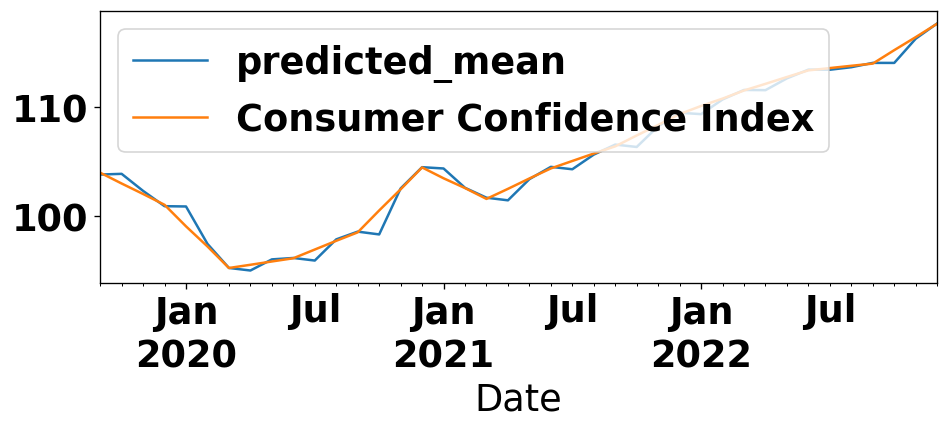

In [55]:
pred.plot(legend = True)
test["Consumer Confidence Index"].plot(legend = True)

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test["Consumer Confidence Index"]))
rmse

0.6414891621256009

In [57]:
test["Consumer Confidence Index"].mean()

105.27411141249998

### Making future predictions ( 1 month)

In [58]:
index_future_dates=pd.date_range(start='2022-12-31',end='2023-01-30')
#print(index_future_dates)
pred_future =model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred_future.index=index_future_dates
print(pred_future)

2022-12-31    117.723619
2023-01-01    117.699558
2023-01-02    117.699558
2023-01-03    117.699558
2023-01-04    117.699558
2023-01-05    117.699558
2023-01-06    117.699558
2023-01-07    117.699558
2023-01-08    117.699558
2023-01-09    117.699558
2023-01-10    117.699558
2023-01-11    117.699558
2023-01-12    117.699558
2023-01-13    117.699558
2023-01-14    117.699558
2023-01-15    117.699558
2023-01-16    117.699558
2023-01-17    117.699558
2023-01-18    117.699558
2023-01-19    117.699558
2023-01-20    117.699558
2023-01-21    117.699558
2023-01-22    117.699558
2023-01-23    117.699558
2023-01-24    117.699558
2023-01-25    117.699558
2023-01-26    117.699558
2023-01-27    117.699558
2023-01-28    117.699558
2023-01-29    117.699558
2023-01-30    117.699558
Freq: D, Name: ARIMA Predictions, dtype: float64


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

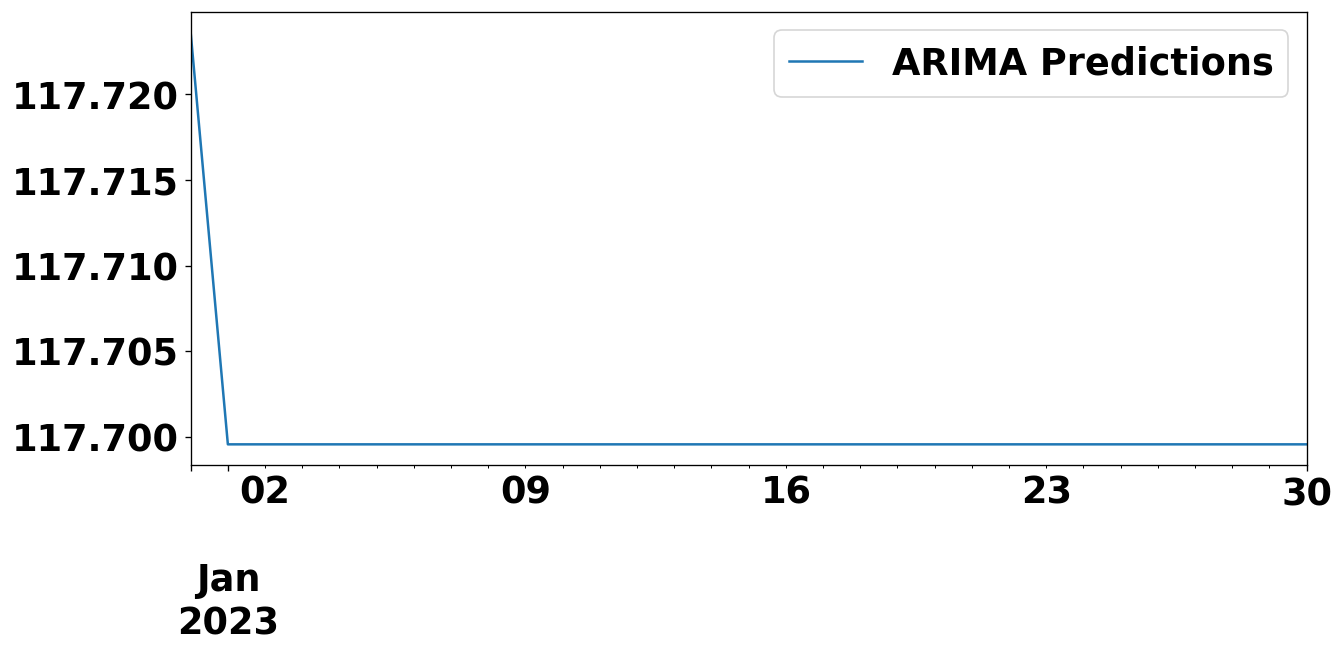

In [59]:
pred_future.plot(figsize=(12,5),legend=True)

# ARCH & GARCH

In [60]:
df = pd.read_excel(r"C:\Users\manis\Desktop\CCI.xlsx",index_col=0)

In [61]:
returns = pd.DataFrame(np.diff(np.log(df["Consumer Confidence Index"].values)))
returns.index = df.index.values[1:df.index.values.shape[0]]
returns.columns = ['CCI Returns']

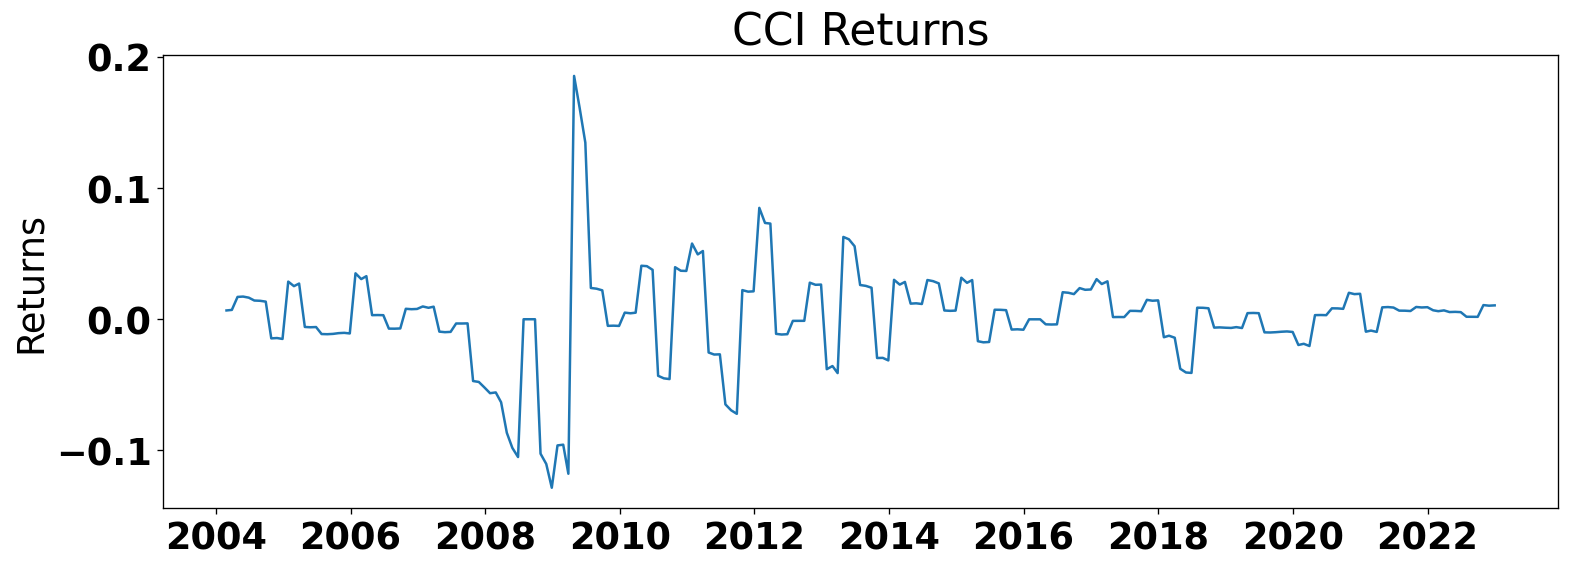

In [62]:
plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('CCI Returns');

In [63]:
df.head()

,Consumer Confidence Index
Date,
2004-01-28,90.303846
2004-02-28,90.906154
2004-03-28,91.550000
2004-04-28,93.115934
2004-05-28,94.734066


In [64]:
returns.head()

,CCI Returns
2004-02-28,0.006648
2004-03-28,0.007058
2004-04-28,0.016960
2004-05-28,0.017228
2004-06-28,0.016395


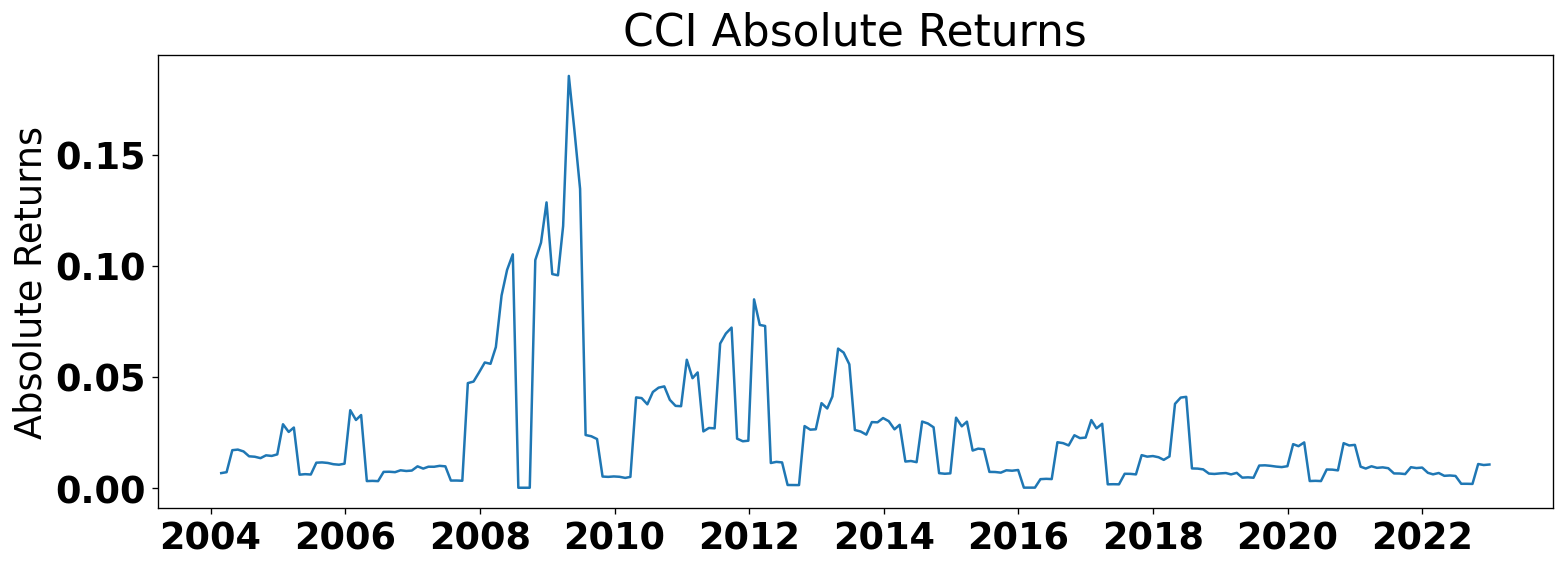

In [65]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('CCI Absolute Returns');

In [66]:
# Module Required
from statsmodels.tsa.stattools import adfuller

# ADF test
# adf_result = adfuller(df, autolag='AIC')

def adfuller_result(df, autolag="AIC"):
    adf_result = adfuller(df, autolag='AIC')
    print("ADF Statistic: {}".format(adf_result[0]))
    print("P-Value: {}".format(adf_result[1]))
    print("Critical Value:")
    for key, value in adf_result[4].items():
        print("\t",key,":",value)
        
    if adf_result[0] < adf_result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [67]:
adfuller_result(df["Consumer Confidence Index"].dropna())

ADF Statistic: -1.8553995882633045
P-Value: 0.35332443060549457
Critical Value:
	 1% : -3.460849270544952
	 5% : -2.87495318813585
	 10% : -2.5739190539191745
Failed to Reject Ho - Time Series is Non-Stationary


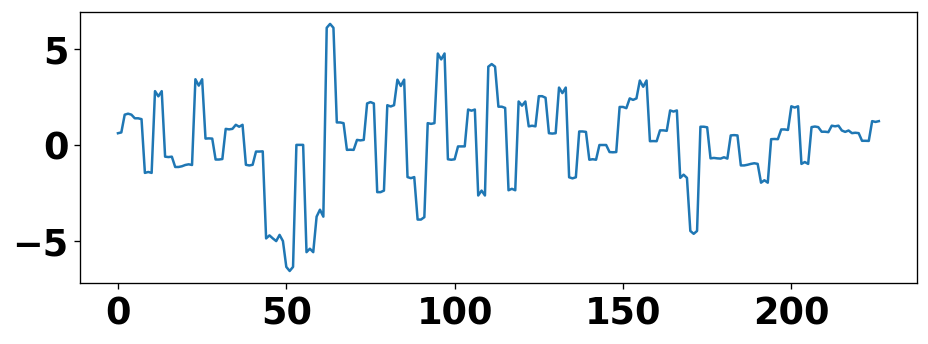

In [68]:
df["diff_1"] = df["Consumer Confidence Index"].diff()
diff_values = df["diff_1"].values
y_diff = diff_values[~np.isnan(diff_values)]
X = y_diff
plt.plot(X)

In [69]:
adfuller_result(X)

ADF Statistic: -3.0414601892069393
P-Value: 0.03119978552073489
Critical Value:
	 1% : -3.460849270544952
	 5% : -2.87495318813585
	 10% : -2.5739190539191745
Reject Ho - Time Series is Stationary


The data is non-stationary. Doing 2nd differencing

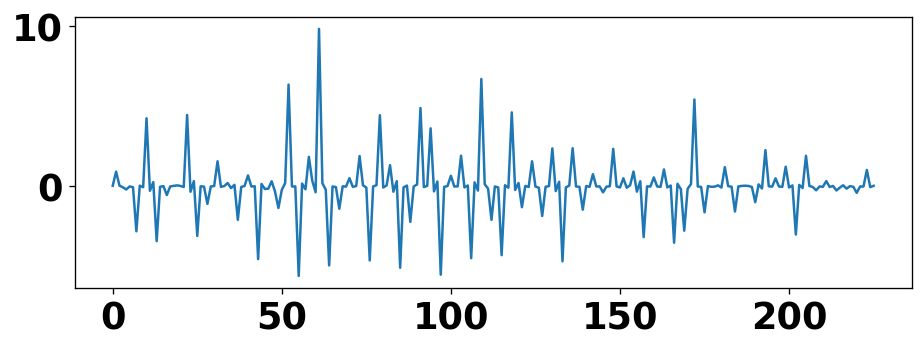

In [70]:
df["diff_2"] = df["diff_1"].diff()
diff_values2 = df["diff_2"].values
y_diff2 = diff_values2[~np.isnan(diff_values2)]
X = y_diff2
plt.plot(X)

In [71]:
adfuller_result(X)

ADF Statistic: -8.318773040563006
P-Value: 3.619988218878821e-13
Critical Value:
	 1% : -3.460849270544952
	 5% : -2.87495318813585
	 10% : -2.5739190539191745
Reject Ho - Time Series is Stationary


The data is now stationary

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

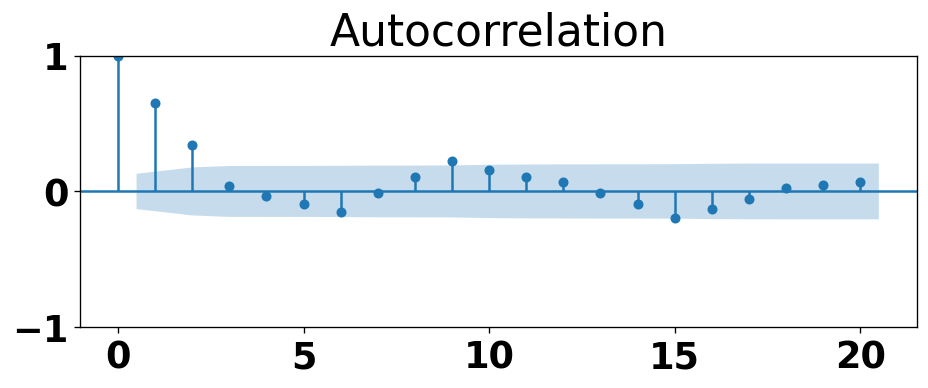

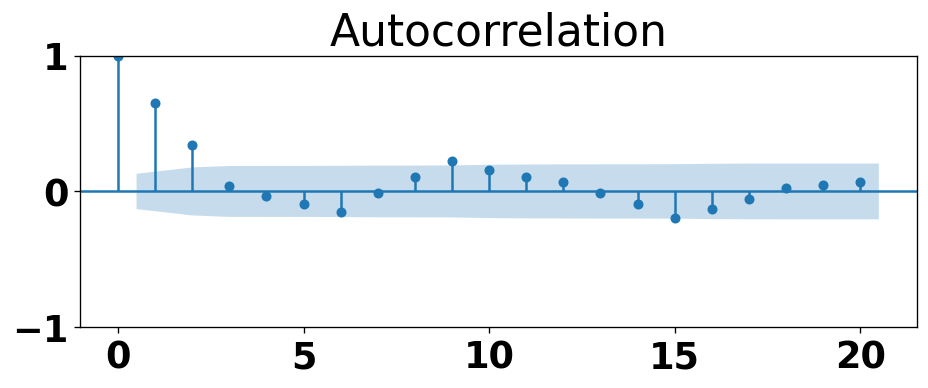

In [73]:
plot_acf(returns,lags=20)

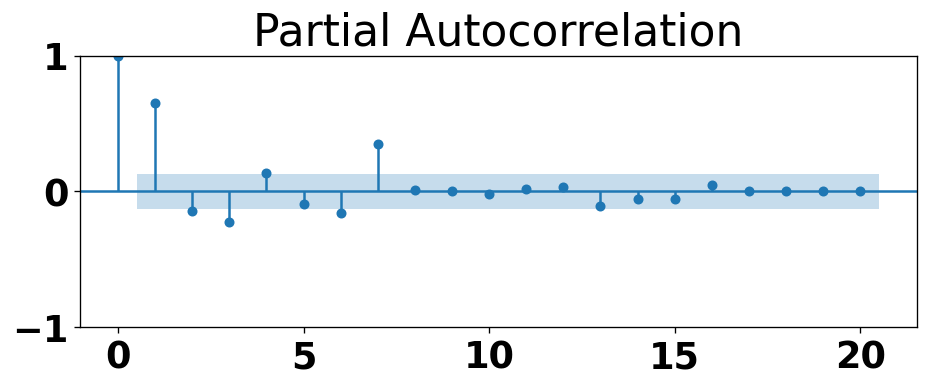

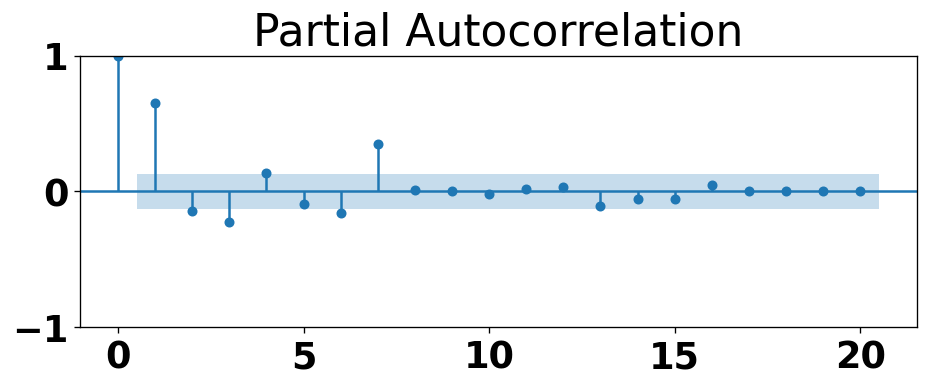

In [74]:
plot_pacf(returns,lags=20)

In [75]:
returnssq=returns**2

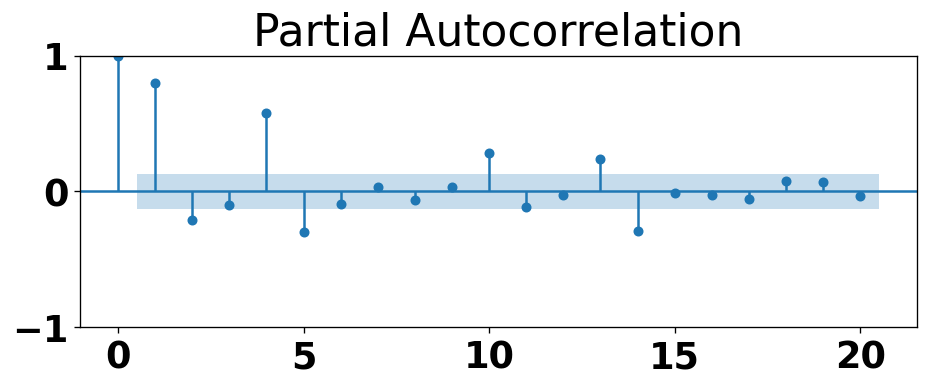

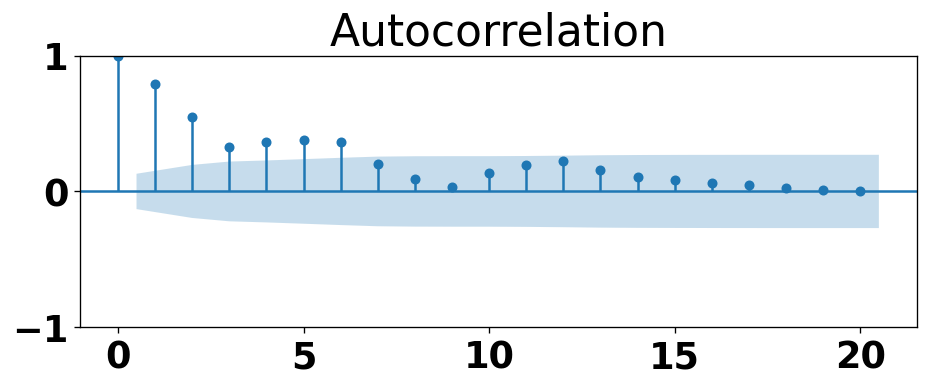

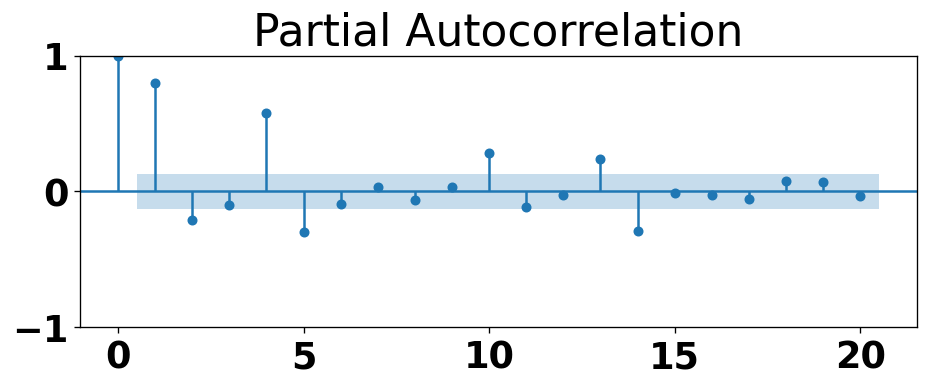

In [76]:
plot_acf(returnssq,lags=20)
plot_pacf(returnssq,lags=20)

In [77]:
# test for presence of ARCH elements in residuals
# using test for homoskedasticity to detect ARCH
#Ho: there is no ARCH presence
#Ha: there is
  
from statsmodels.stats.diagnostic import het_arch
archtest = het_arch(returns.dropna())
print('p value is :',archtest[1])

p value is : 1.4221053847648631e-31


p value is < 0.05 . Hence we reject the null hypothesis. Which mean that there is a presence of ARCH

In [78]:
 !pip install arch

In [79]:
from arch import arch_model

In [80]:
train = df.iloc[:-40]
test = df.iloc[-40 : ]

In [81]:
train

,Consumer Confidence Index,diff_1,diff_2
Date,,,
2004-01-28,90.303846,NaN,NaN
2004-02-28,90.906154,0.602308,NaN
2004-03-28,91.550000,0.643846,4.153860e-02
2004-04-28,93.115934,1.565934,9.220879e-01
2004-05-28,94.734066,1.618132,5.219770e-02
...,...,...,...
2019-04-30,106.167912,0.487912,1.204356e+00
2019-05-31,106.672088,0.504176,1.626370e-02
2019-06-30,107.160000,0.487912,-1.626370e-02


In [82]:
model = arch_model(train['Consumer Confidence Index'], mean='Zero', vol='ARCH', p=1)
x = model.fit()
x.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 1096.307400284808
Iteration:      2,   Func. Count:      7,   Neg. LLF: 1096.3058276374115
Iteration:      3,   Func. Count:     10,   Neg. LLF: 1096.3057751651963
Iteration:      4,   Func. Count:     12,   Neg. LLF: 1096.305775165179
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1096.3057751651963
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Zero Mean - ARCH Model Results                           
=====================================================================================
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.000
Mean Model:                        Zero Mean   Adj. R-squared:                  0.005
Vol Model:                              ARCH   Log-Likelihood:               -1096.31
Distribution:                         Normal   AIC:                           2196.61
Method:                   Maximum Likelihood   BIC:                           2203.08
                                               No. Observations:                  188
Date:                       Mon, Jan 31 2022   Df Residuals:                      188
Time:                               19:40:06   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         54.4182    101.821      0.534      0.593 [-1.451e+02,2.540e+02]
alpha[1]       0.9941  1.556e-02     63.898      0.000      [  0.964,  1.025]
=============================================================================

Covariance estimator: robust
"""

In [83]:
model = arch_model(train['Consumer Confidence Index'], mean='Zero', vol='GARCH', p=1,q=1)
x = model.fit()
x.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5349.240045928191
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1096.3246530475144
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1096.3228879944465
Iteration:      4,   Func. Count:     19,   Neg. LLF: 1096.3158137755513
Iteration:      5,   Func. Count:     23,   Neg. LLF: 1096.3076598280086
Iteration:      6,   Func. Count:     27,   Neg. LLF: 1096.3076483718542
Iteration:      7,   Func. Count:     30,   Neg. LLF: 1096.3076483778527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1096.3076483718542
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Zero Mean - GARCH Model Results                           
=====================================================================================
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.000
Mean Model:                        Zero Mean   Adj. R-squared:                  0.005
Vol Model:                             GARCH   Log-Likelihood:               -1096.31
Distribution:                         Normal   AIC:                           2198.62
Method:                   Maximum Likelihood   BIC:                           2208.32
                                               No. Observations:                  188
Date:                       Mon, Jan 31 2022   Df Residuals:                      188
Time:                               19:40:06   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        158.8077     94.741      1.676  9.369e-02 [-26.881,3.445e+02]
alpha[1]       0.9754  8.439e-02     11.558  6.745e-31   [  0.810,  1.141]
beta[1]        0.0000  8.303e-02      0.000      1.000   [ -0.163,  0.163]
==========================================================================

Covariance estimator: robust
"""

In [84]:
model = arch_model(train['Consumer Confidence Index'], mean='Zero', vol='GARCH', p=2,q=2)
x = model.fit()
x.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5349.216589524589
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1096.3196091455222
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1096.3182997010904
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1096.3131250171778
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1096.3076538350906
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1096.3076485255117
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1096.3076485352174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1096.3076485255117
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Zero Mean - GARCH Model Results                           
=====================================================================================
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.000
Mean Model:                        Zero Mean   Adj. R-squared:                  0.005
Vol Model:                             GARCH   Log-Likelihood:               -1096.31
Distribution:                         Normal   AIC:                           2202.62
Method:                   Maximum Likelihood   BIC:                           2218.80
                                               No. Observations:                  188
Date:                       Mon, Jan 31 2022   Df Residuals:                      188
Time:                               19:40:07   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        158.8090     86.189      1.843  6.539e-02 [-10.118,3.277e+02]
alpha[1]       0.9754  7.920e-02     12.315  7.490e-35   [  0.820,  1.131]
alpha[2]   6.5906e-17      0.407  1.621e-16      1.000   [ -0.797,  0.797]
beta[1]        0.0000      0.342      0.000      1.000   [ -0.671,  0.671]
beta[2]    2.8467e-17      0.167  1.704e-16      1.000   [ -0.327,  0.327]
==========================================================================

Covariance estimator: robust
"""

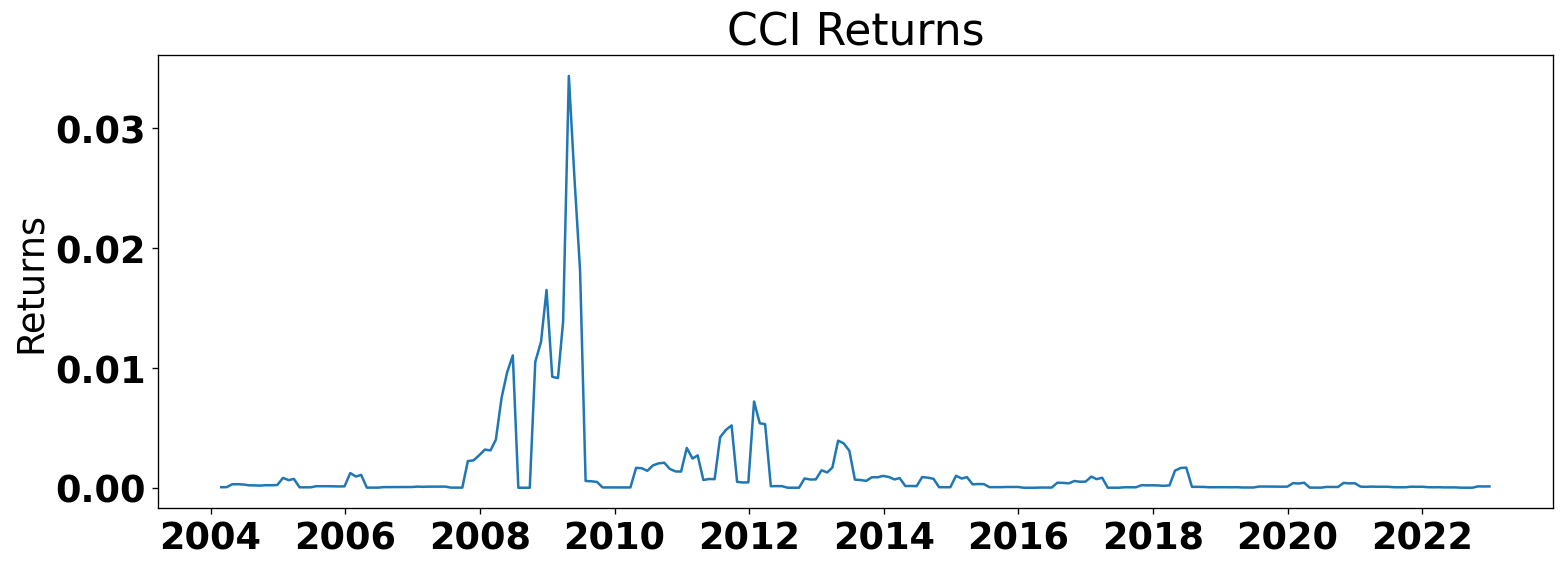

In [85]:
plt.figure(figsize=(15,5));
plt.plot(returns.index,returnssq);
plt.ylabel('Returns');
plt.title('CCI Returns');

### Making Predictions

In [86]:
predictions = x.forecast(horizon=len(test))

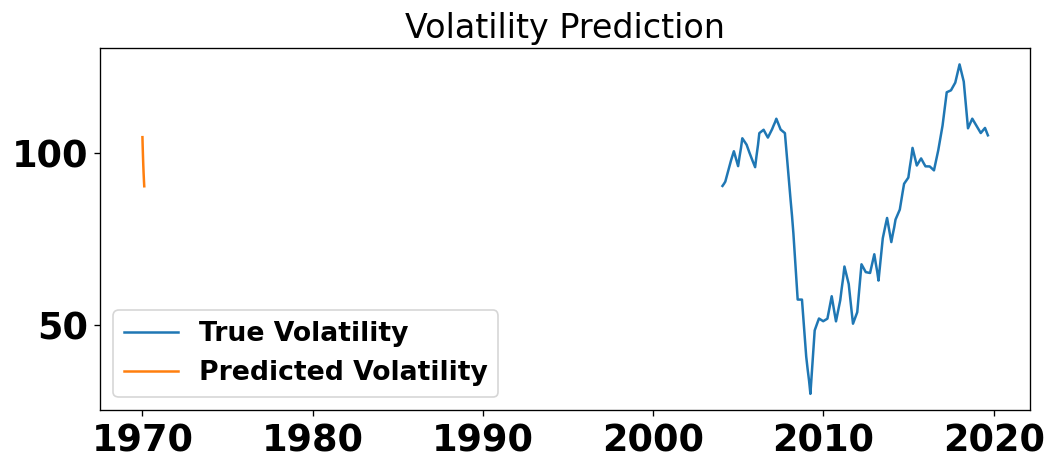

In [87]:
plt.figure(figsize=(10,4))
true, = plt.plot(train['Consumer Confidence Index'])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GRANGER CASUALITY 

### Assumption :
Both the time series are stationary

t1(t) = c + alpha1t1(t-1) + beta1 * t2(t-1) + alpha2t1(t-2) + beta2 * t2(t-2) + ...

H0: t2 does not Granger cause t1, the betas associated with t2 are all zero

H1: t2 Granger causes t1, , not all the betas associated with t2 are zero

Reject Ho if the pvalues are below a desired size of the test

In [88]:
t1 = pd.read_excel(r"C:\Users\manis\Desktop\Unemployment rate.xlsx",index_col=0) #unemployment
t2 = pd.read_excel(r"C:\Users\manis\Desktop\CCI.xlsx",index_col=0) #CCI

In [89]:
t1.head()

,Unemployment Rate (National Level)
Date,
2004-01-28,5.785714
2004-02-28,5.744286
2004-03-28,5.700000
2004-04-28,5.667033
2004-05-28,5.632967


In [90]:
len(t1),len(t2)

(228, 228)

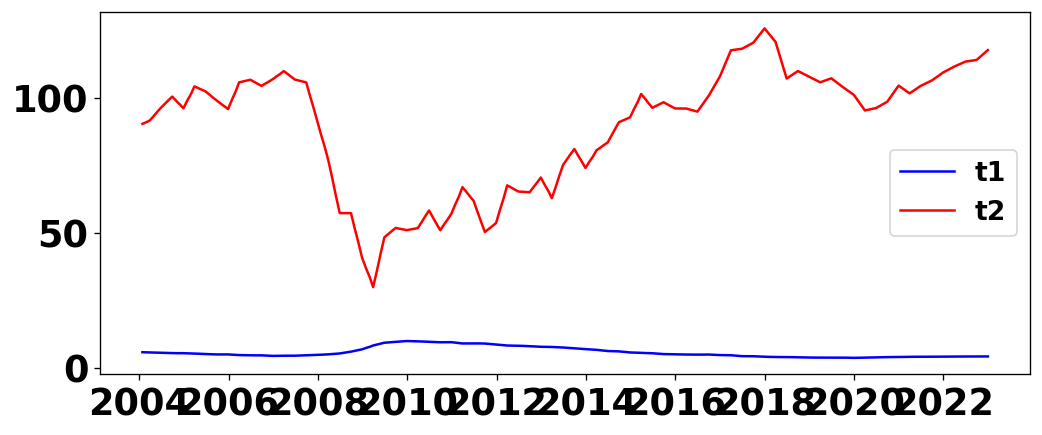

In [91]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16);

In [92]:
def check_stationarity(y):    
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [93]:
check_stationarity(t1) # series is non-stationary

ADF Statistic: -2.103276
p-value: 0.243199
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [94]:
check_stationarity(t2) # series is non-stationary

ADF Statistic: -1.855400
p-value: 0.353324
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


## Making t1 and t2 stationary

### Making T2 stationary

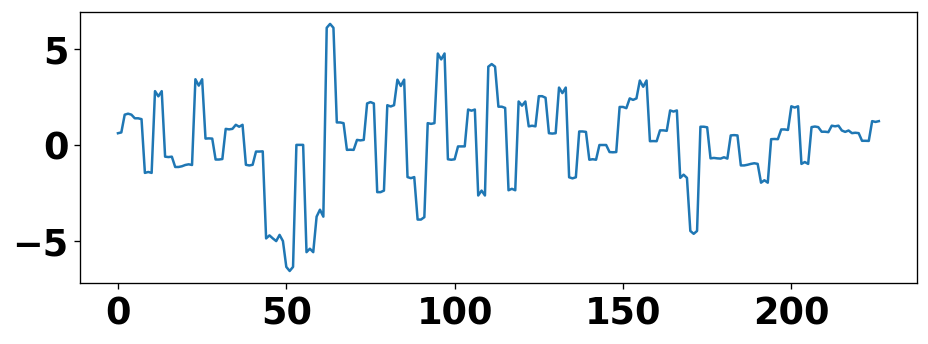

In [95]:
t2["diff_1"] = t2["Consumer Confidence Index"].diff()
diff_values = t2["diff_1"].values
y_diff = diff_values[~np.isnan(diff_values)]
X = y_diff
plt.plot(X)

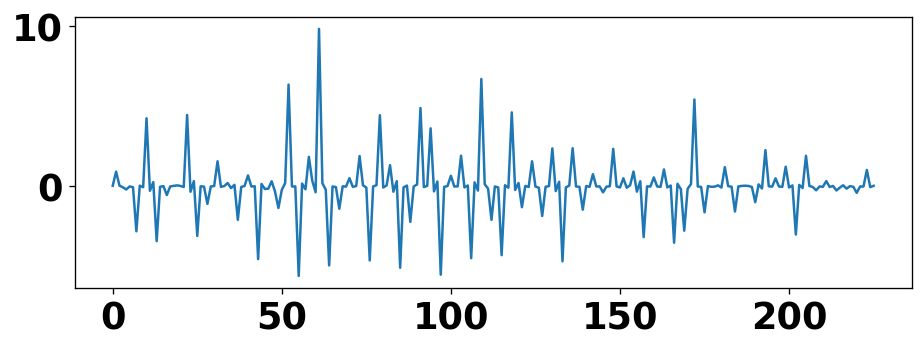

In [96]:
t2["diff_2"] = t2["diff_1"].diff()
diff_values2 = t2["diff_2"].values
y_diff2 = diff_values2[~np.isnan(diff_values2)]
X = y_diff2
plt.plot(X)

In [97]:
## T2 is not stationary
check_stationarity(X)

ADF Statistic: -8.318773
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


In [98]:
## Making T1 stationary

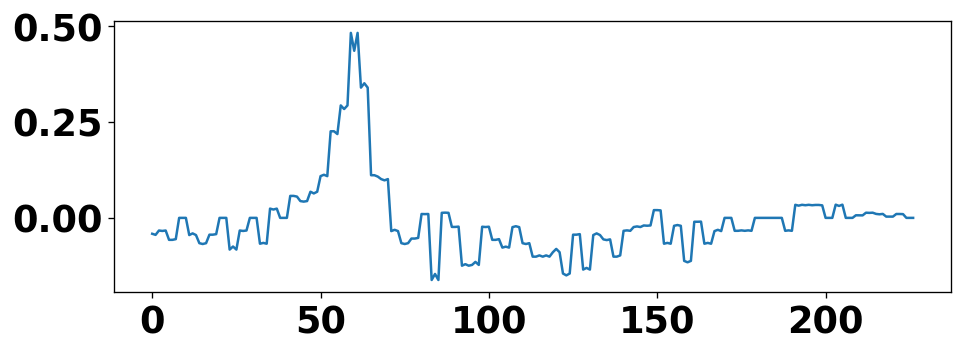

In [99]:
t1["diff_1"] = t1["Unemployment Rate (National Level)"].diff()
diff_values = t1["diff_1"].values
y_diff = diff_values[~np.isnan(diff_values)]
Y = y_diff
plt.plot(Y)

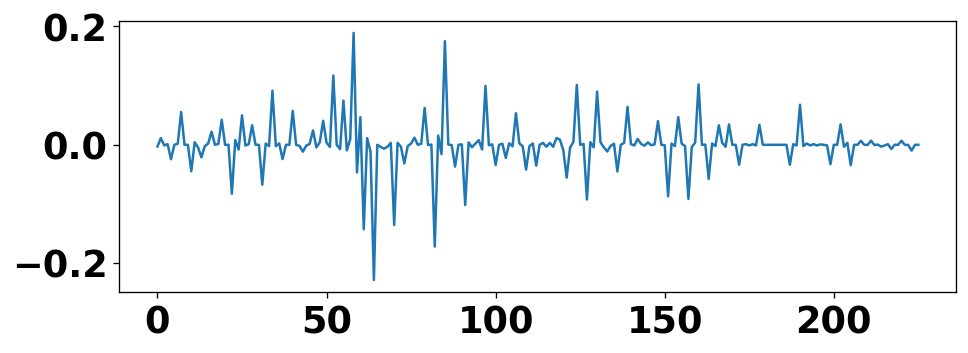

In [100]:
t1["diff_2"] = t1["diff_1"].diff()
diff_values2 = t1["diff_2"].values
y_diff2 = diff_values2[~np.isnan(diff_values2)]
Y = y_diff2
plt.plot(Y)

In [101]:
# T1 is now stationary
check_stationarity(Y)

ADF Statistic: -5.068698
p-value: 0.000016
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574


## Combining them in 1 data frame

In [102]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(X,Y))

In [103]:
ts_df

,t2,t1
0,4.153860e-02,-0.002857
1,9.220879e-01,0.011319
2,5.219770e-02,-0.001099
3,-5.219770e-02,0.001099
4,-1.877819e-01,-0.024316
...,...,...
221,1.000000e-07,0.000000
222,-6.739200e-03,-0.000326
223,1.027717e+00,-0.009783
224,-3.967390e-02,0.000000


In [105]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(ts_df, maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5805  , p=0.4469  , df_denom=222, df_num=1
ssr based chi2 test:   chi2=0.5883  , p=0.4431  , df=1
likelihood ratio test: chi2=0.5876  , p=0.4434  , df=1
parameter F test:         F=0.5805  , p=0.4469  , df_denom=222, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4781  , p=0.6206  , df_denom=219, df_num=2
ssr based chi2 test:   chi2=0.9780  , p=0.6132  , df=2
likelihood ratio test: chi2=0.9759  , p=0.6139  , df=2
parameter F test:         F=0.4781  , p=0.6206  , df_denom=219, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9641  , p=0.1203  , df_denom=216, df_num=3
ssr based chi2 test:   chi2=6.0834  , p=0.1076  , df=3
likelihood ratio test: chi2=6.0019  , p=0.1115  , df=3
parameter F test:         F=1.9641  , p=0.1203  , df_denom=216, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5780  , p=0.1813  

## Since in 6th lag p value < 0.05, Hence T2(CCI) is granger causing T1(unemployment).